# Mobile Price Prediction

In [56]:
#Importing EDA and Visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

#Defining figure parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

Importing Dataset

In [57]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# About Dataset
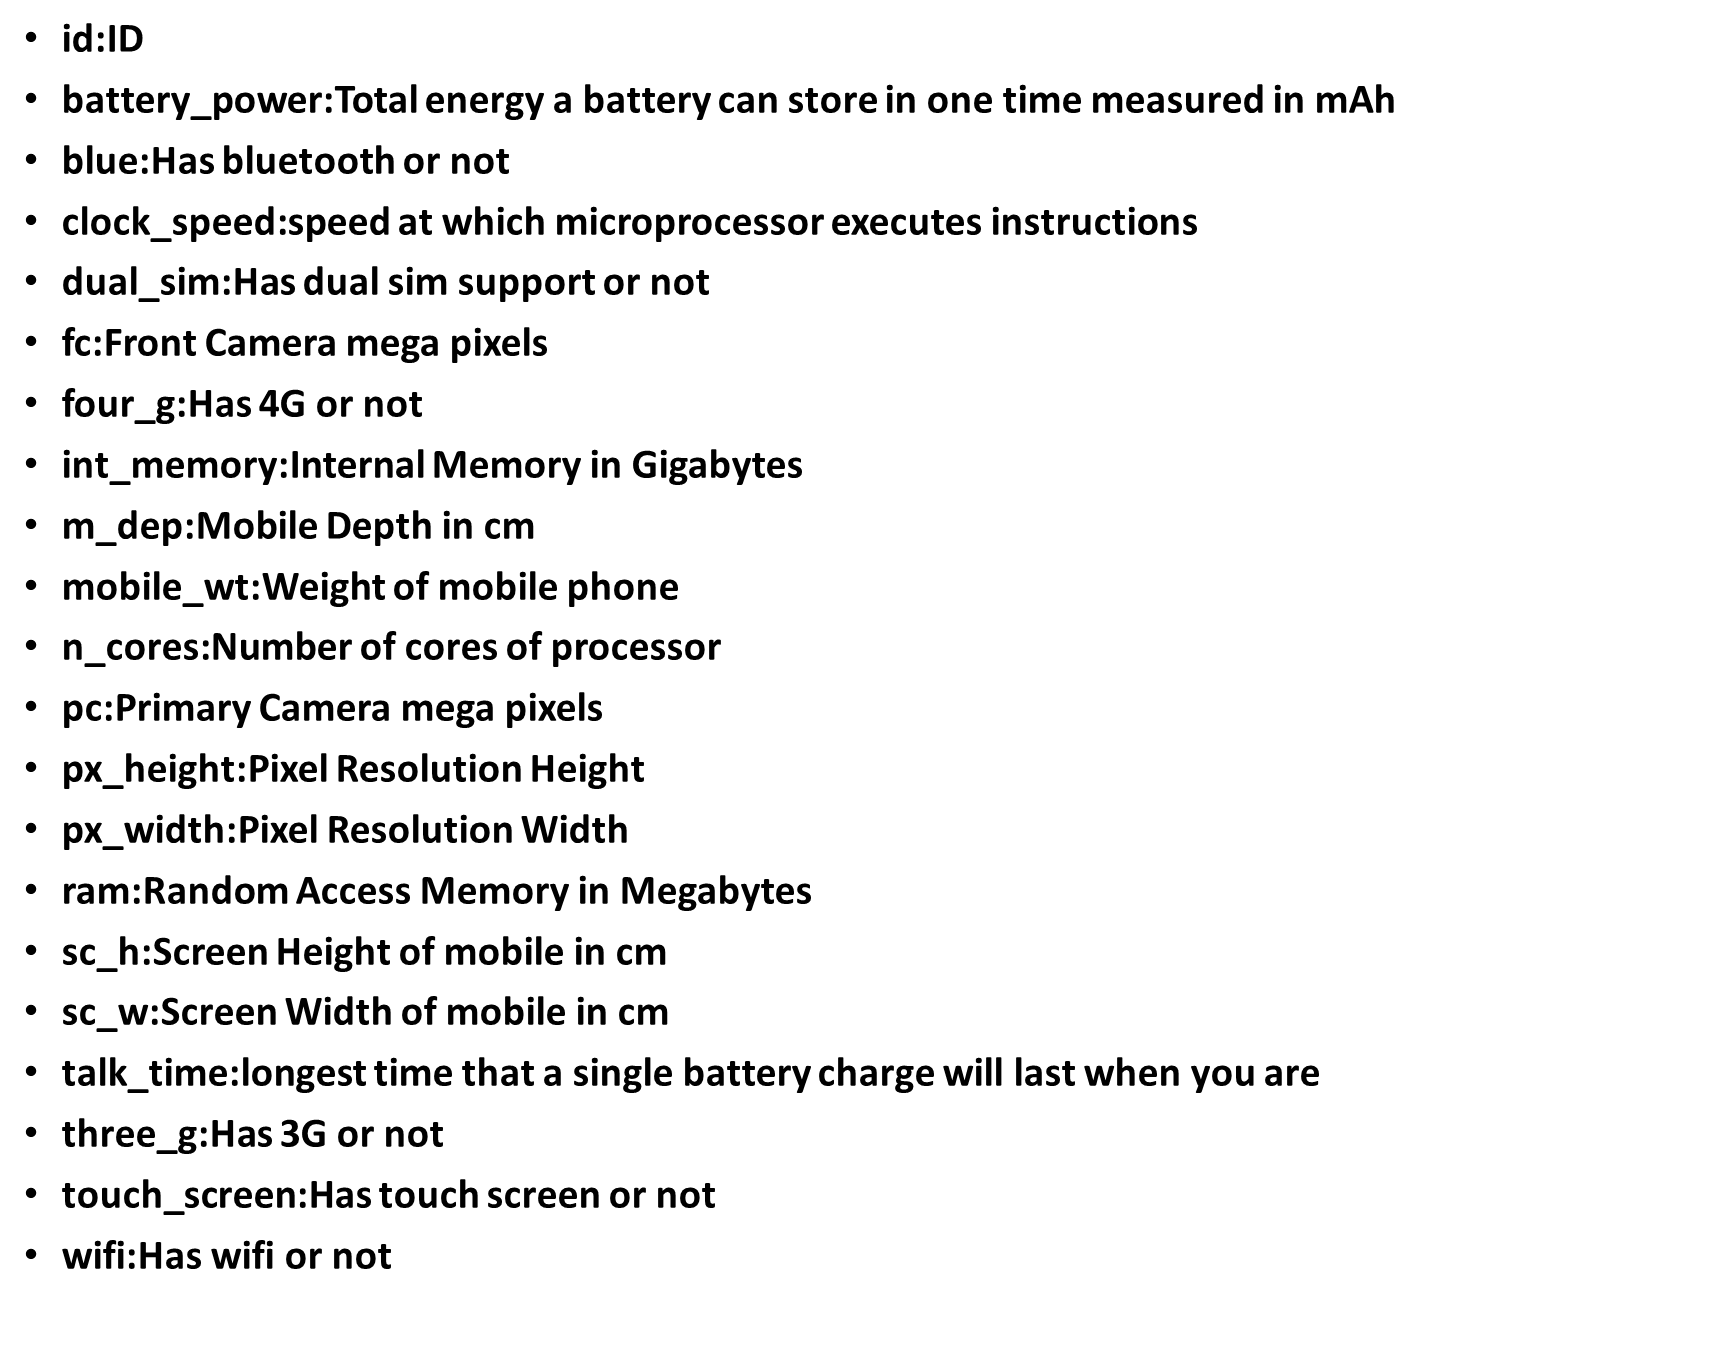

In [58]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [59]:
train.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [60]:
train.shape

(2000, 21)

In [61]:
# Checking Duplicate Values
train.duplicated().sum()

0

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

-There is no missing Value and There is no duplicate data

# Outlier Checking

In [63]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [64]:
# From the above descriptive statistical analysis it is clear that there is no outlier in any feature and all are in range.
# Also the data needs to be scaled before predicting as all features values are not in same ranges.
# There is no need for encoding as there is no categorical or object type feature present

In [65]:
# Additional analysis for Outlier 

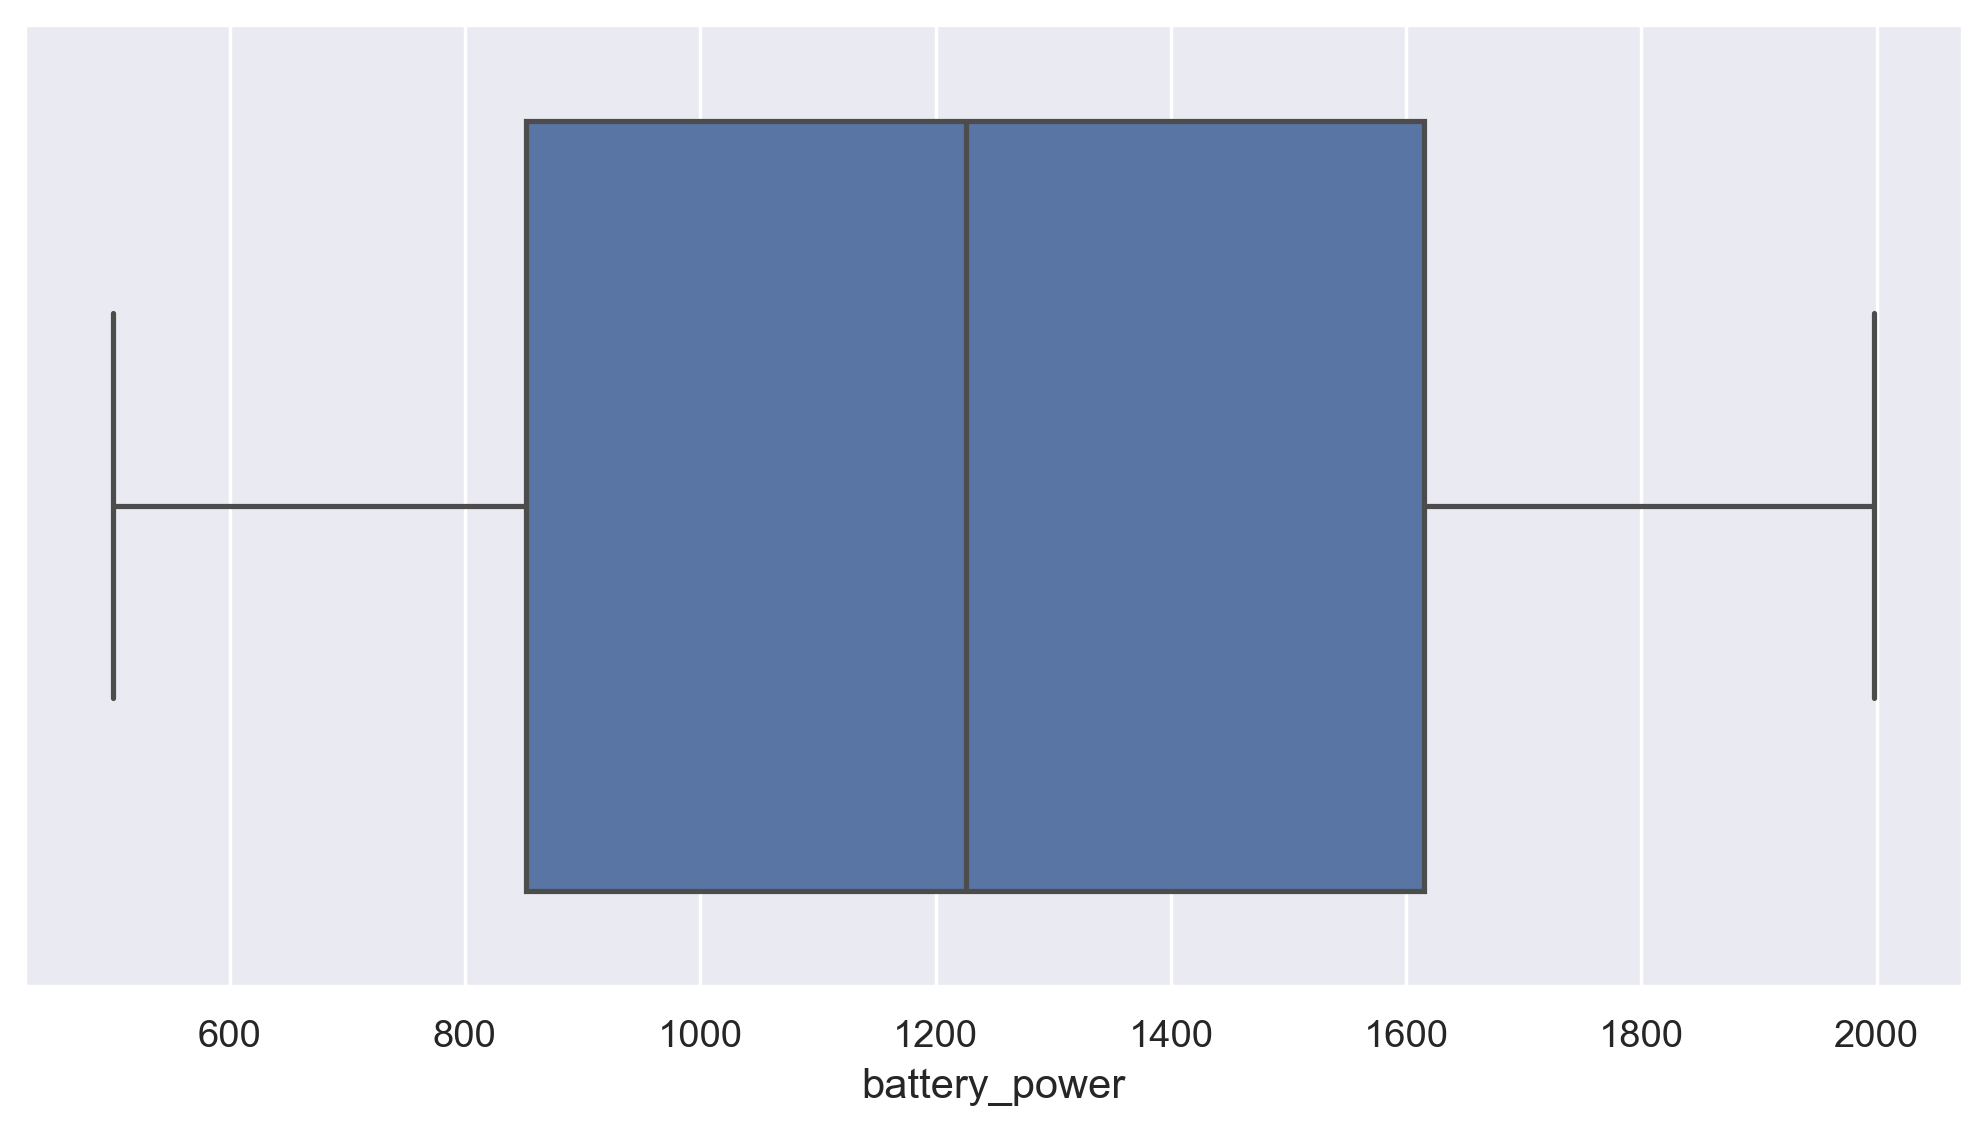

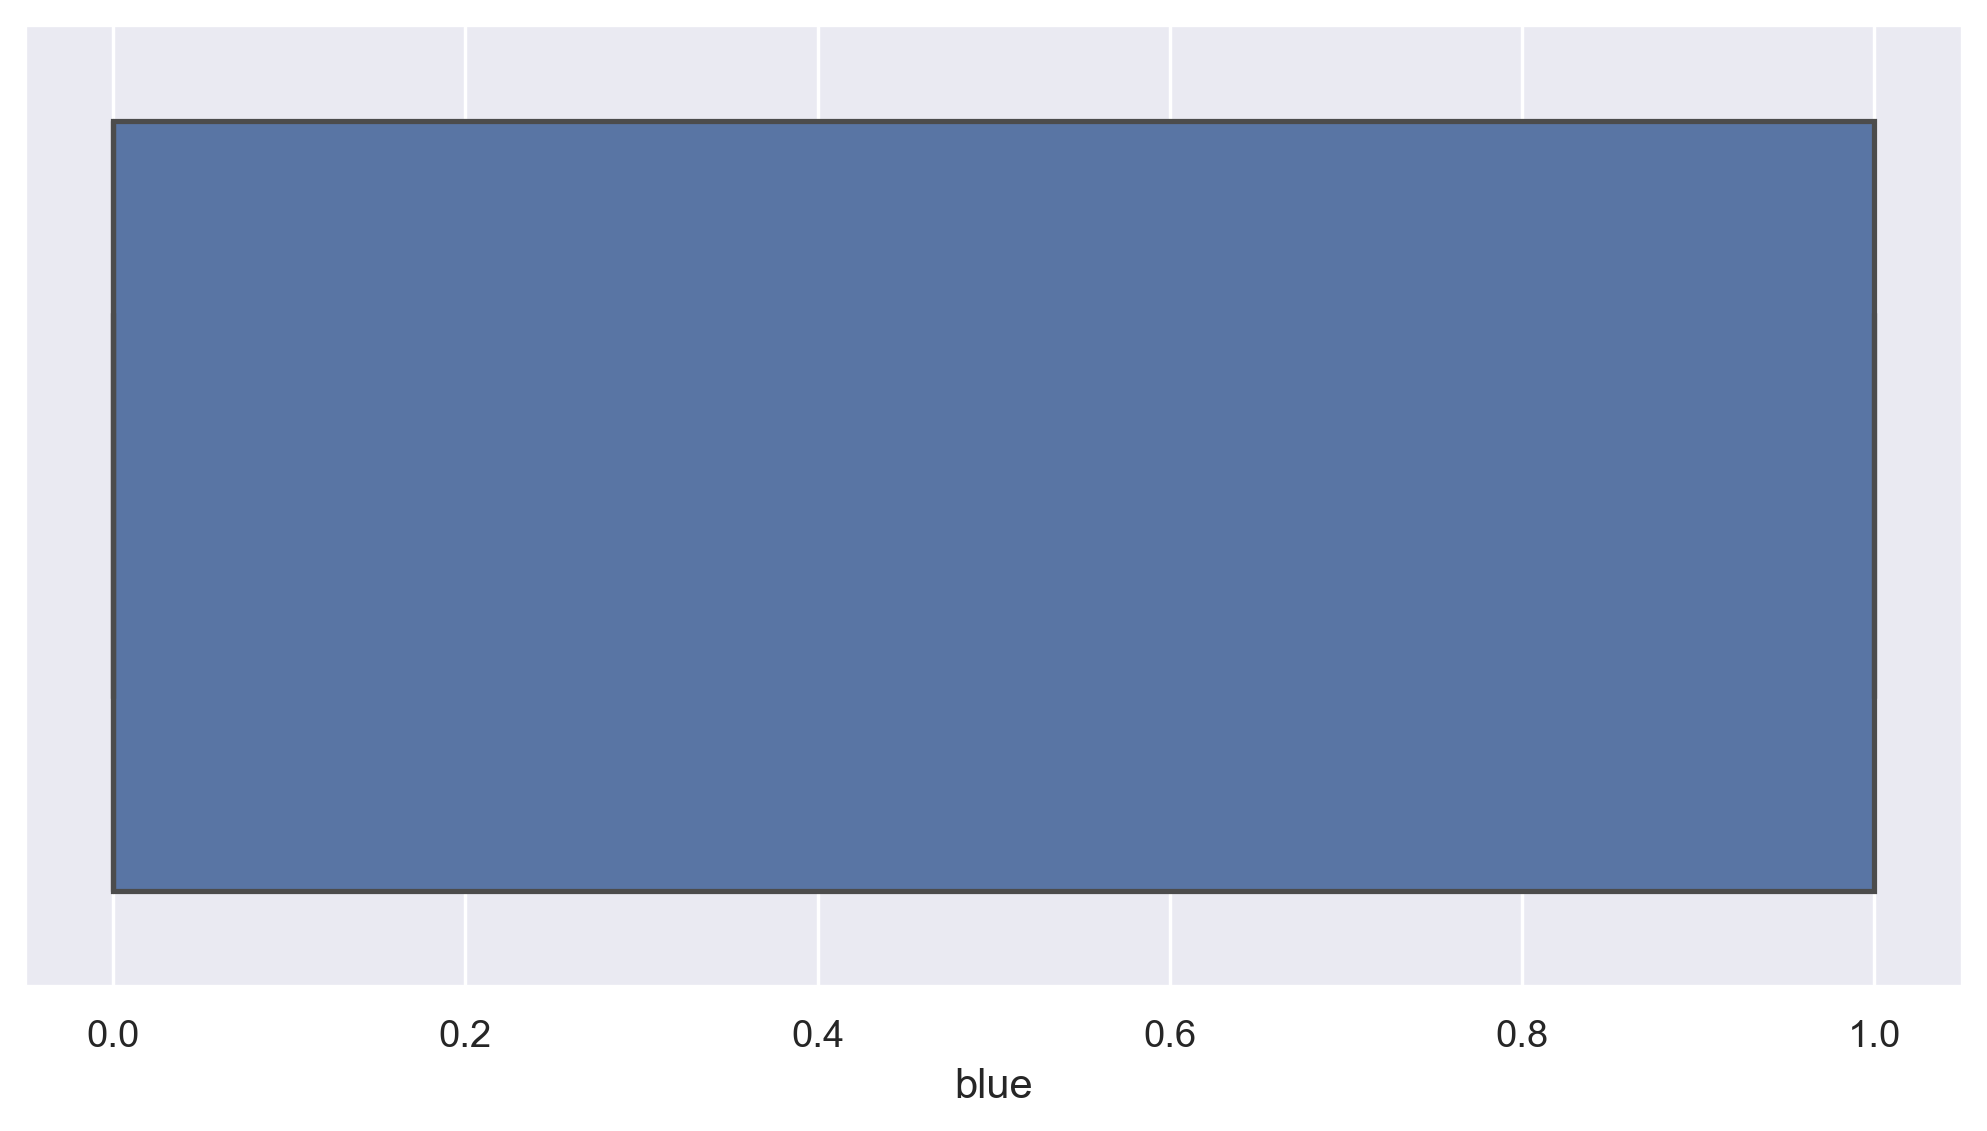

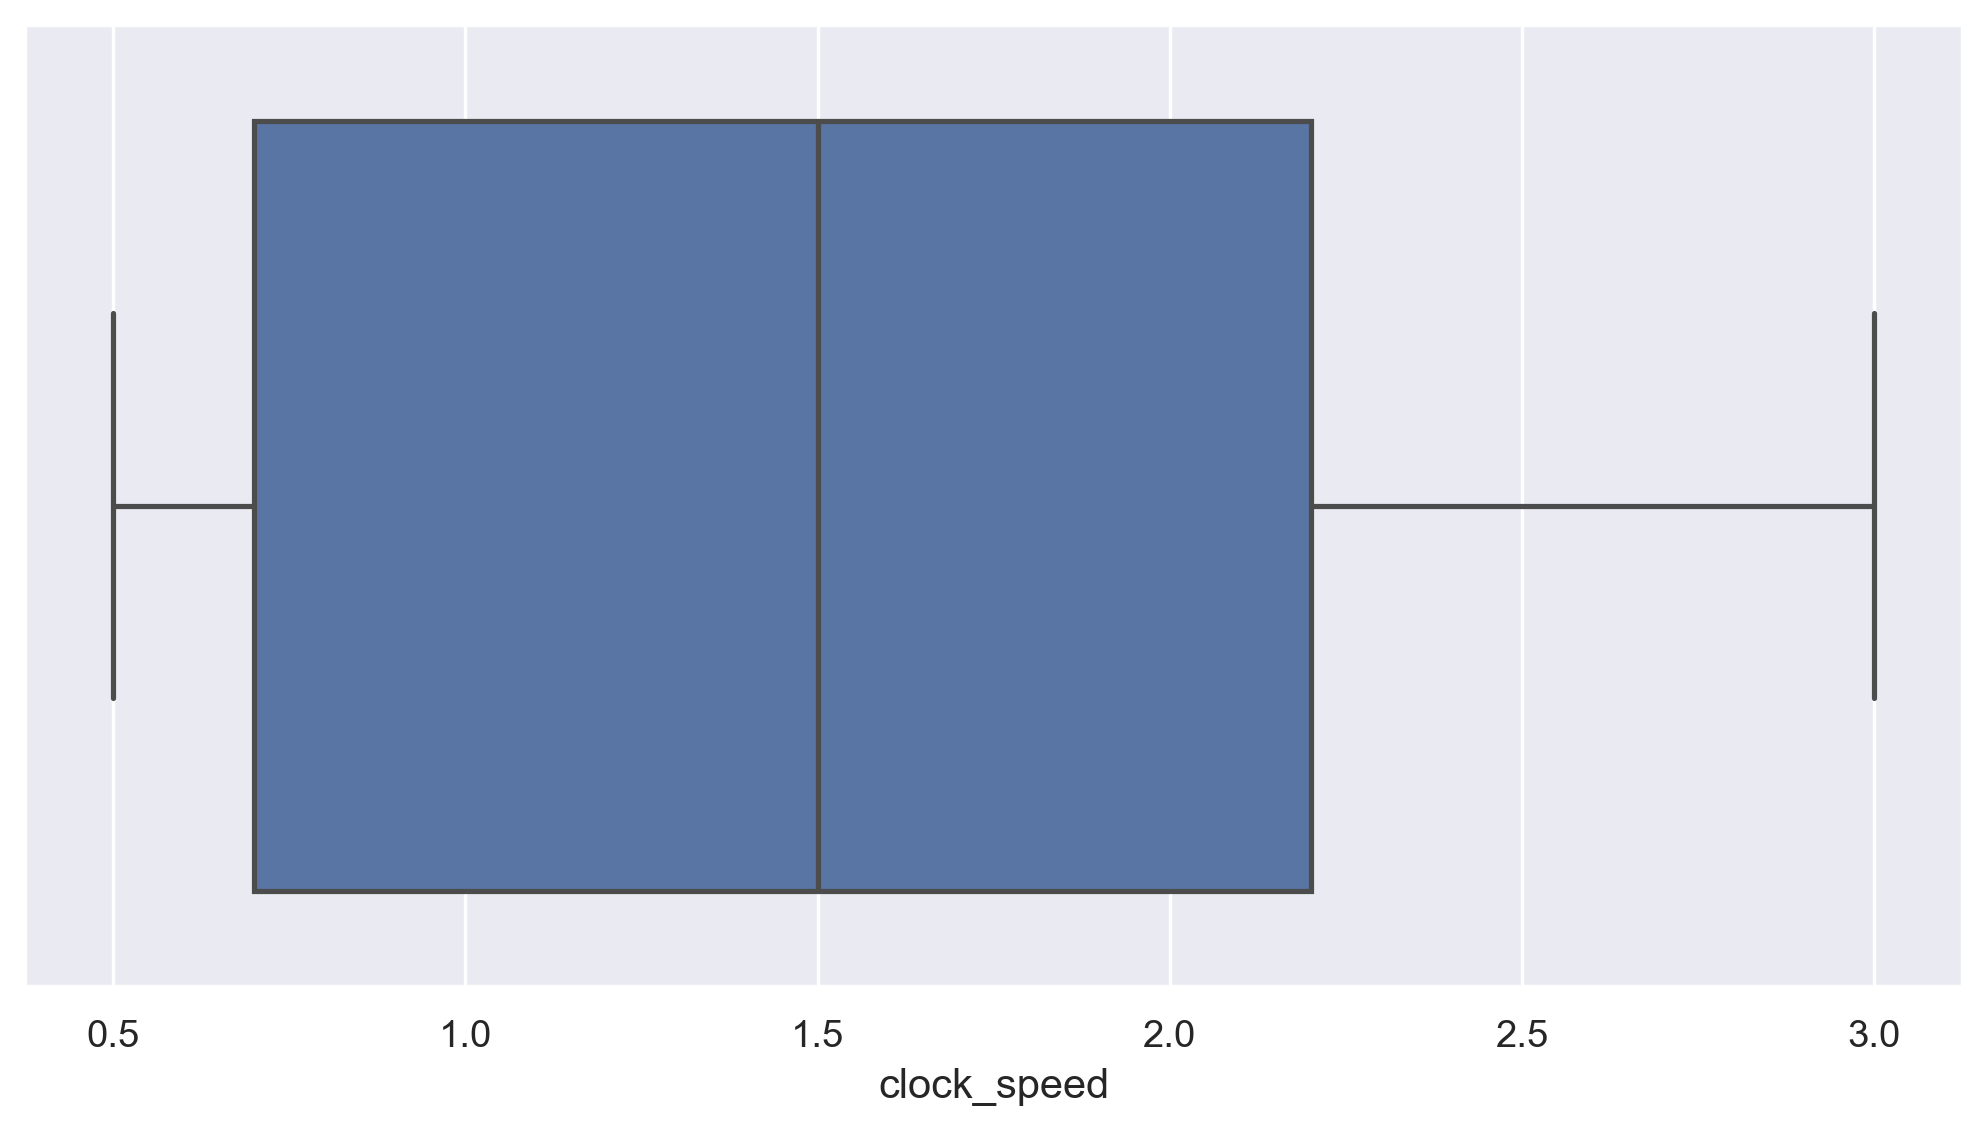

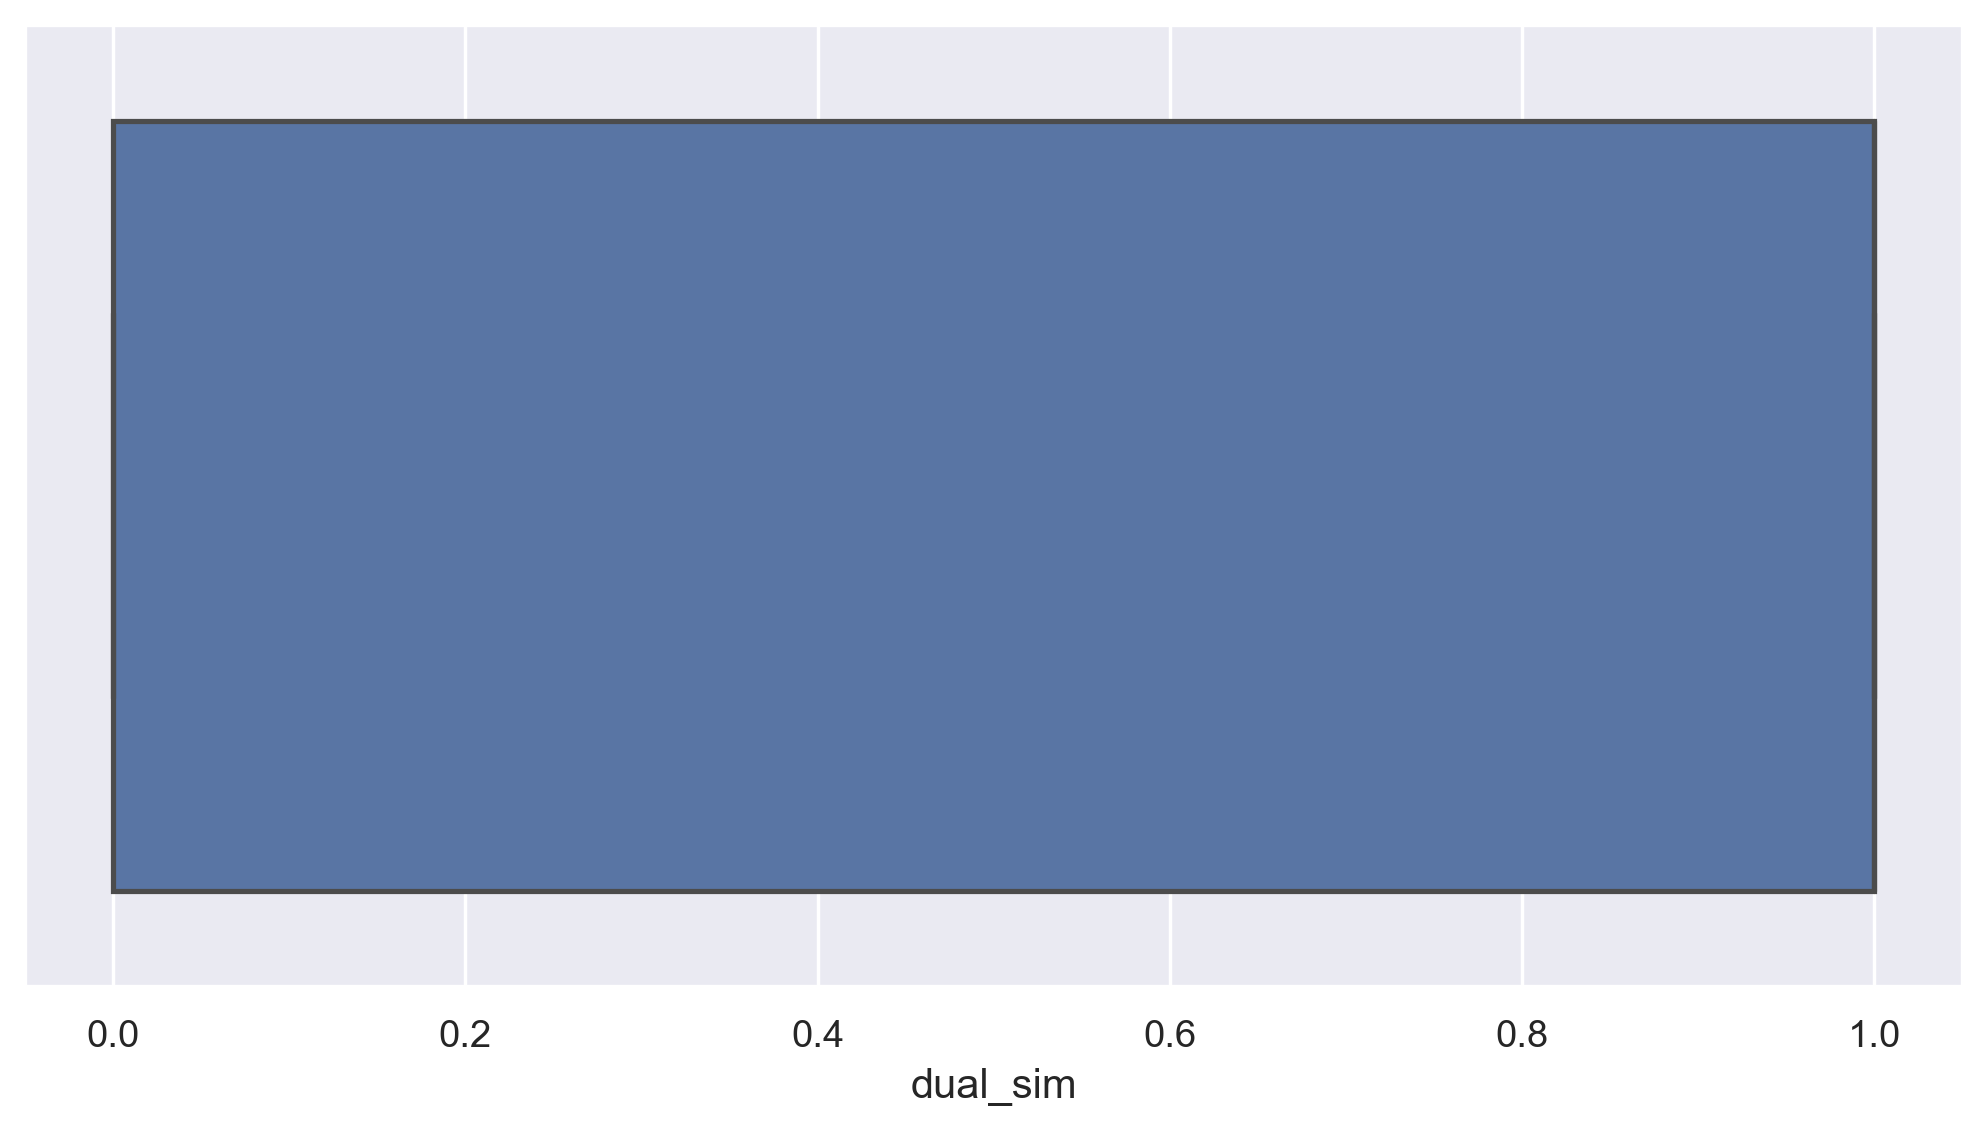

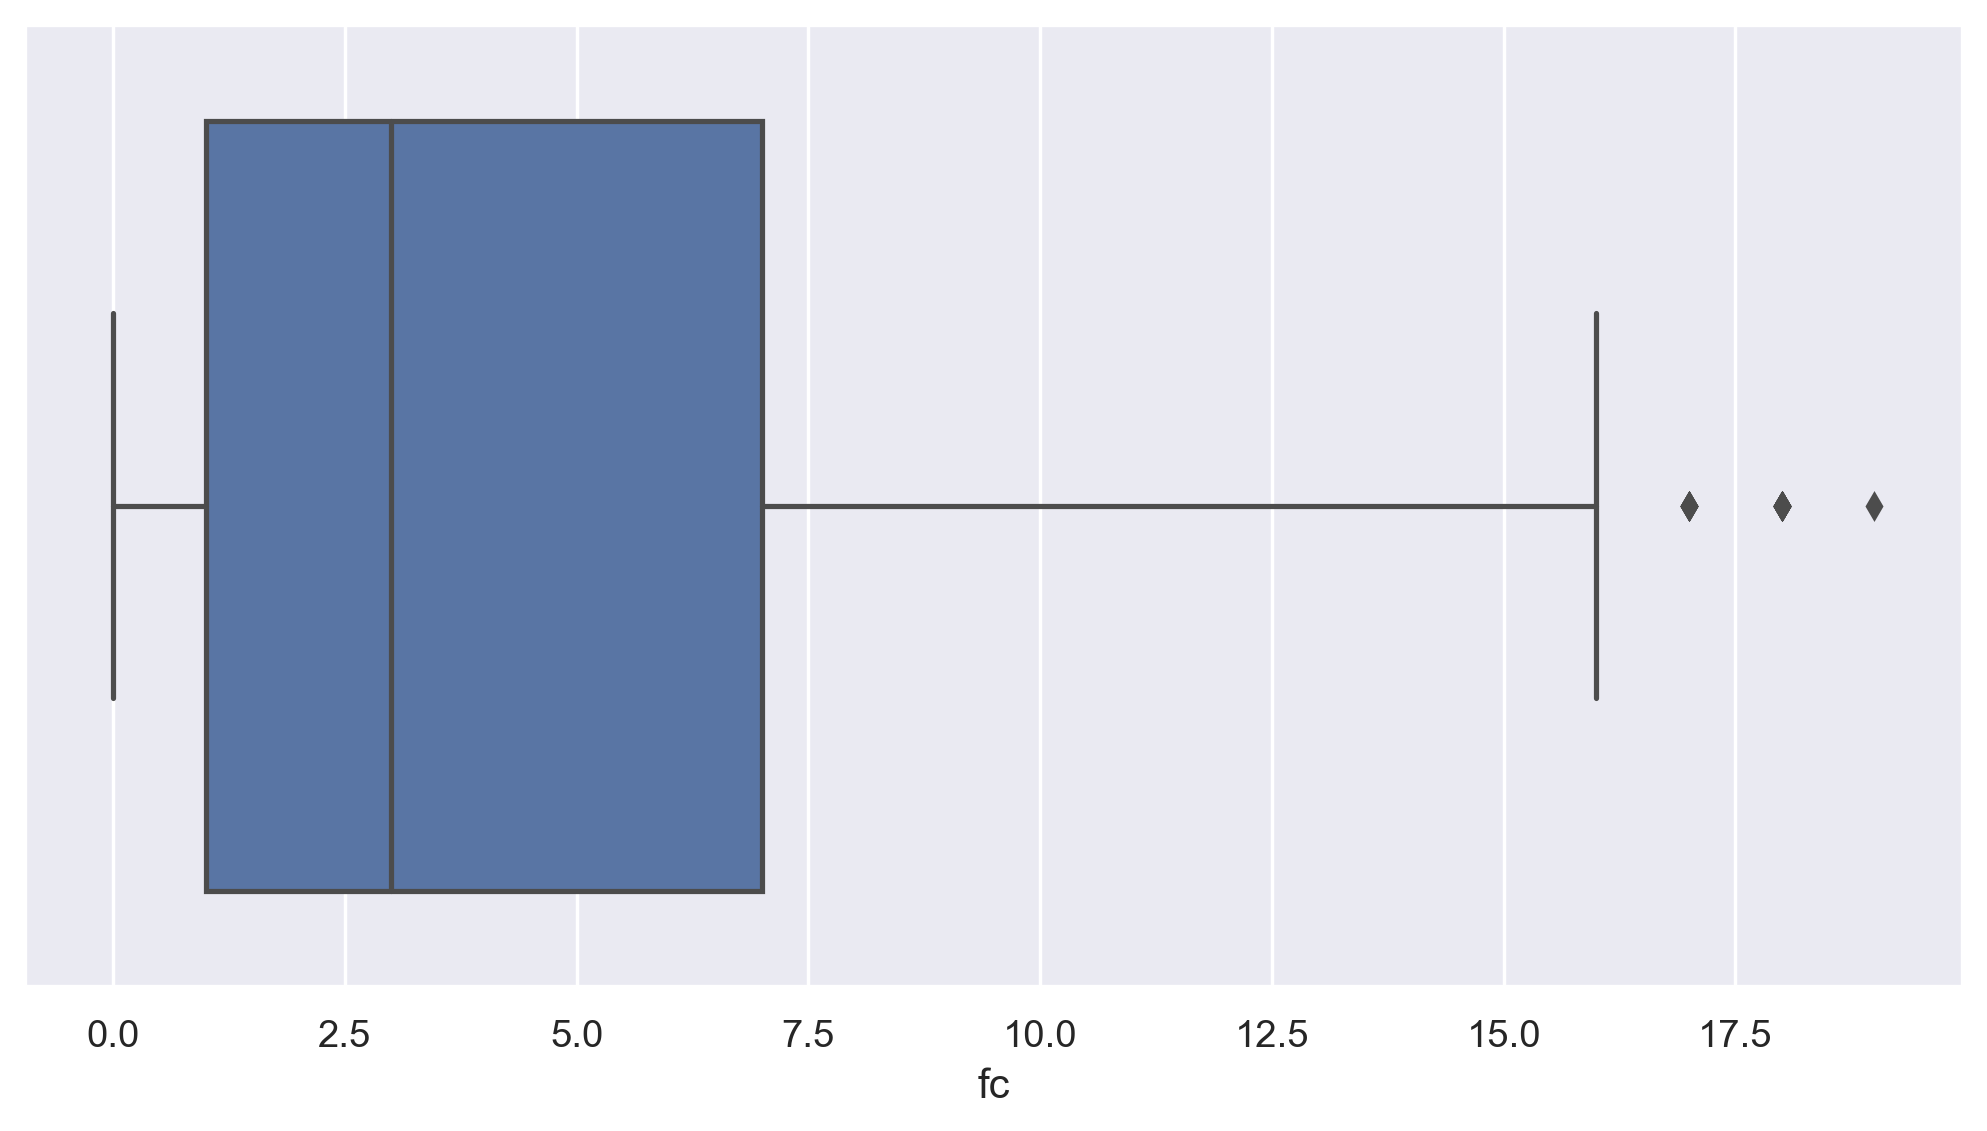

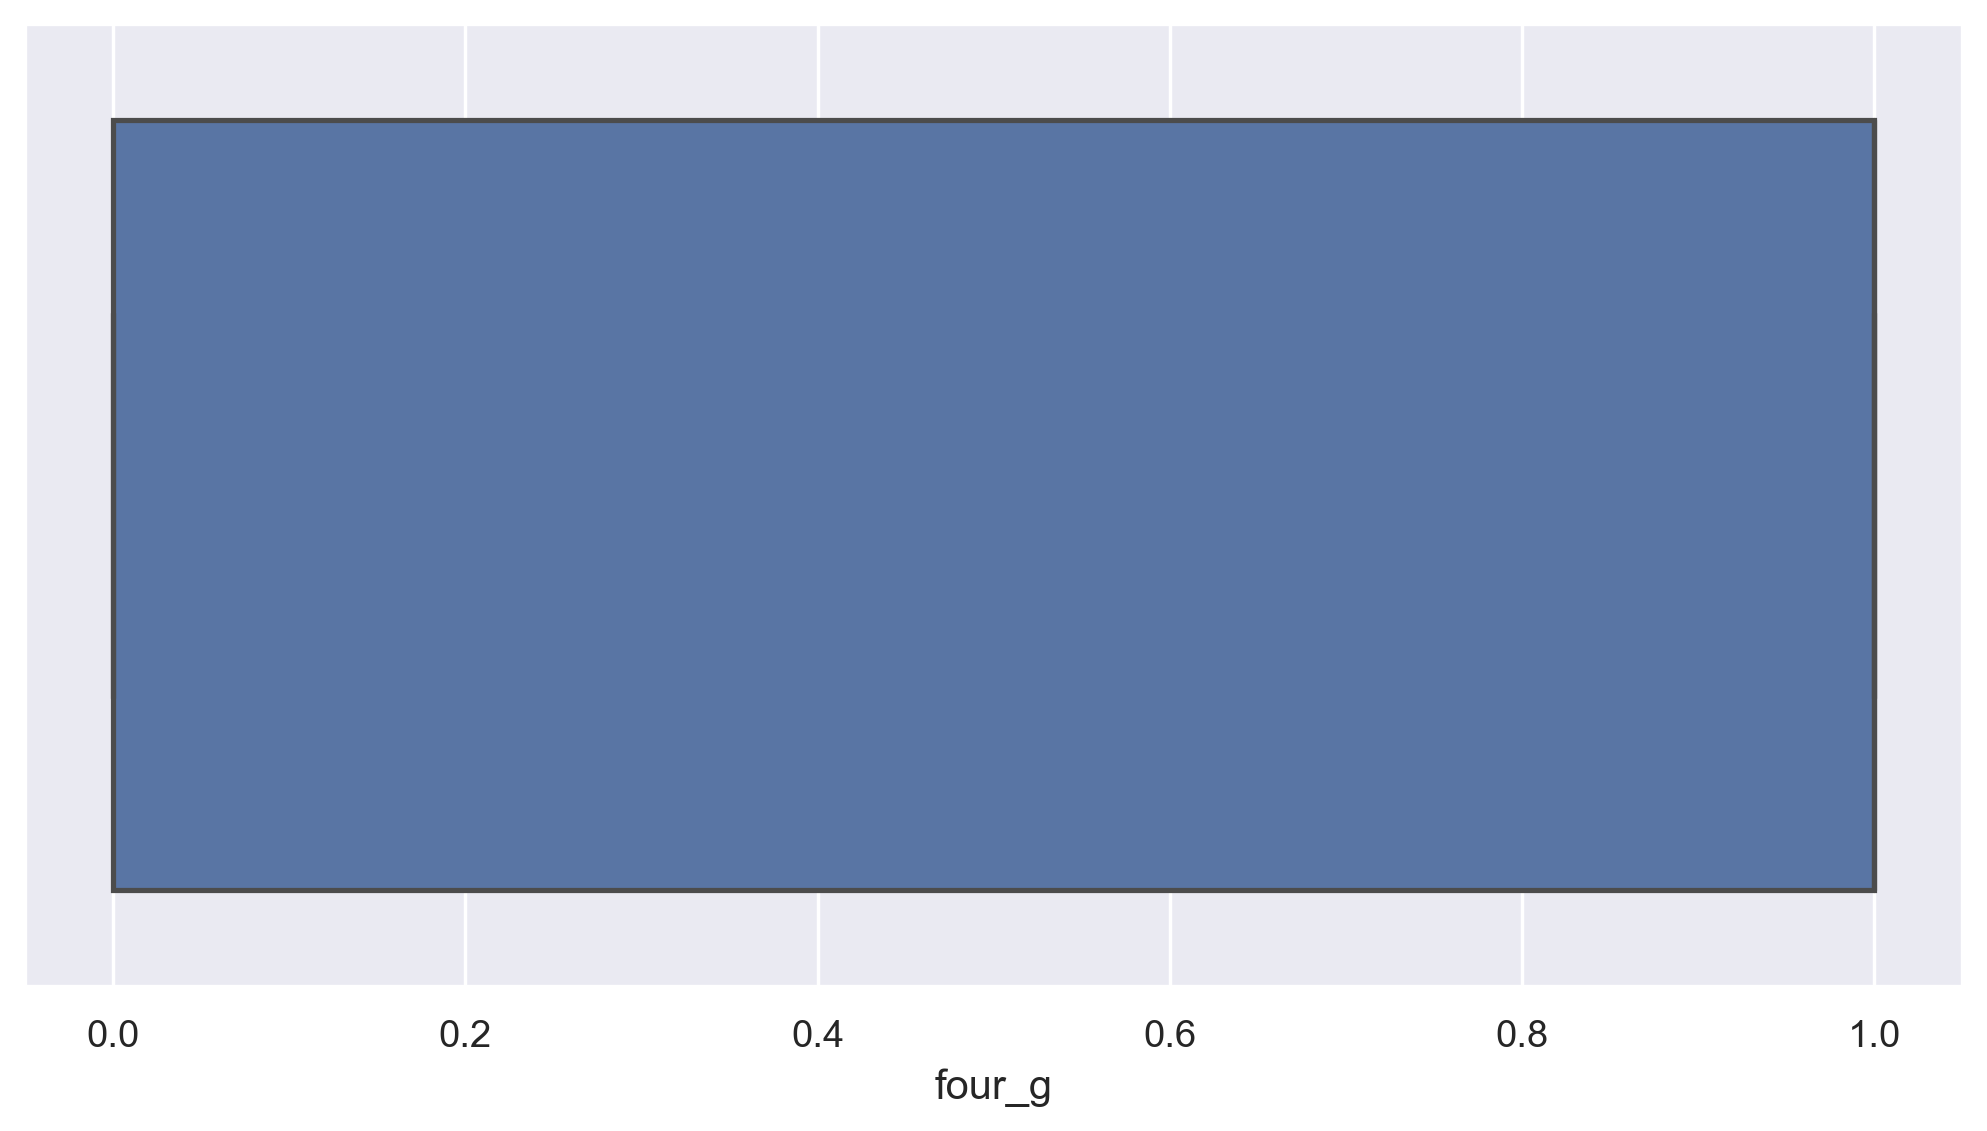

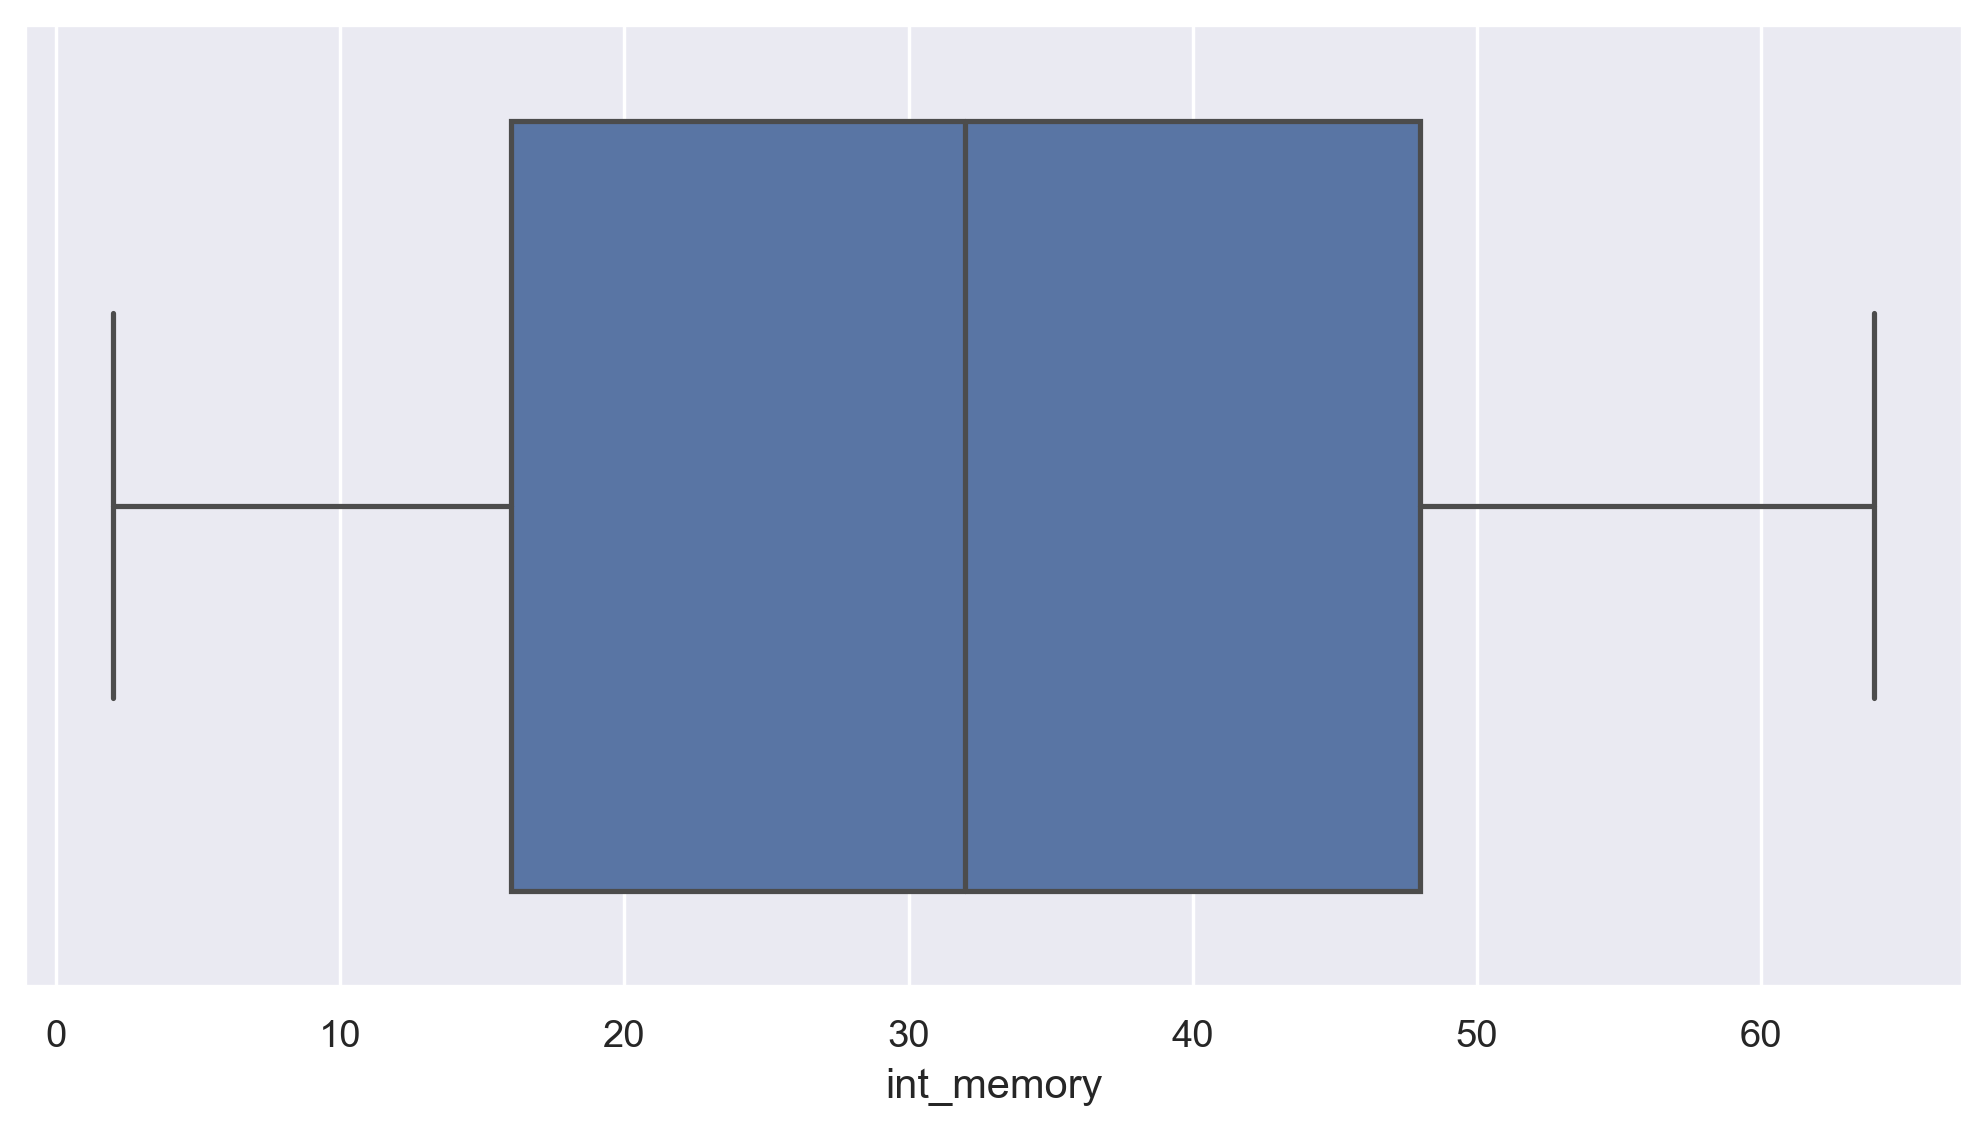

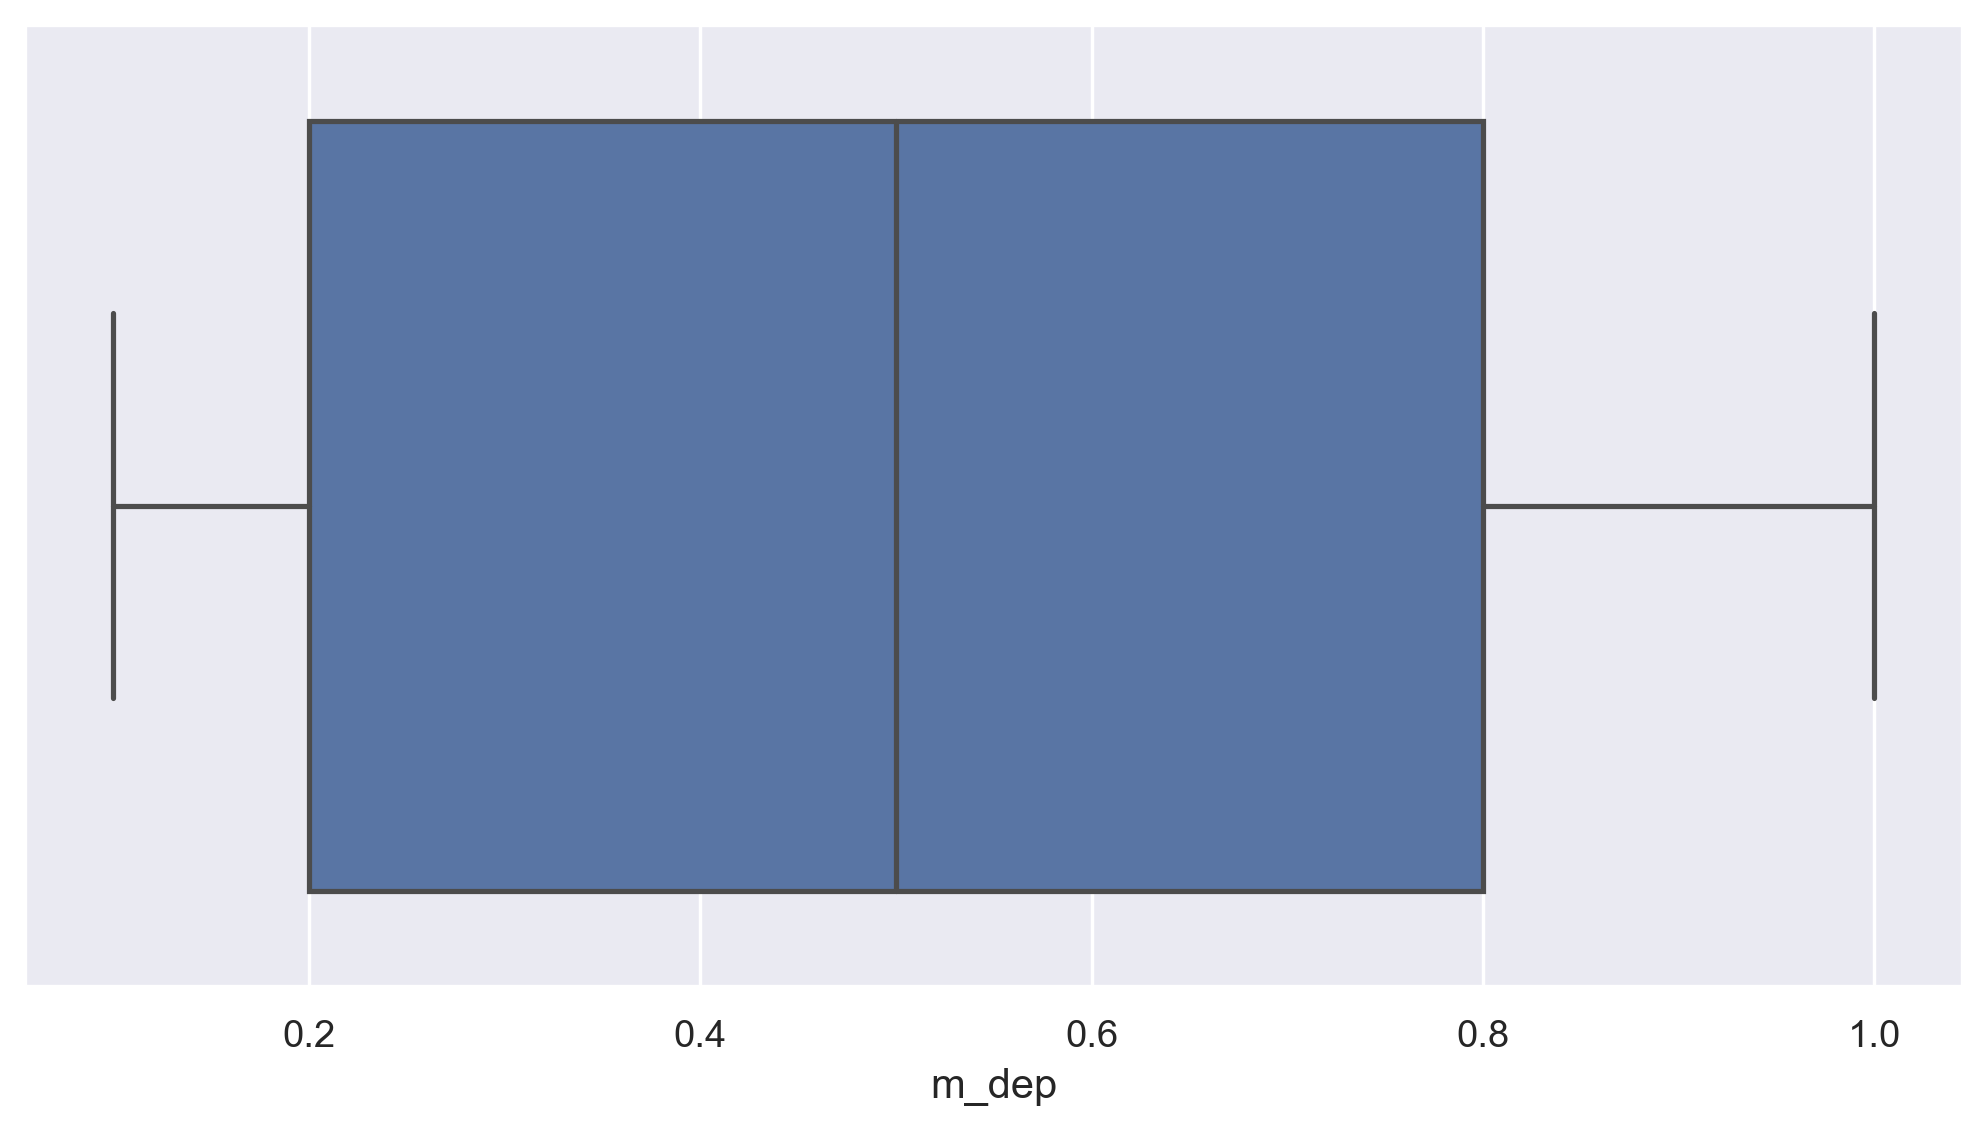

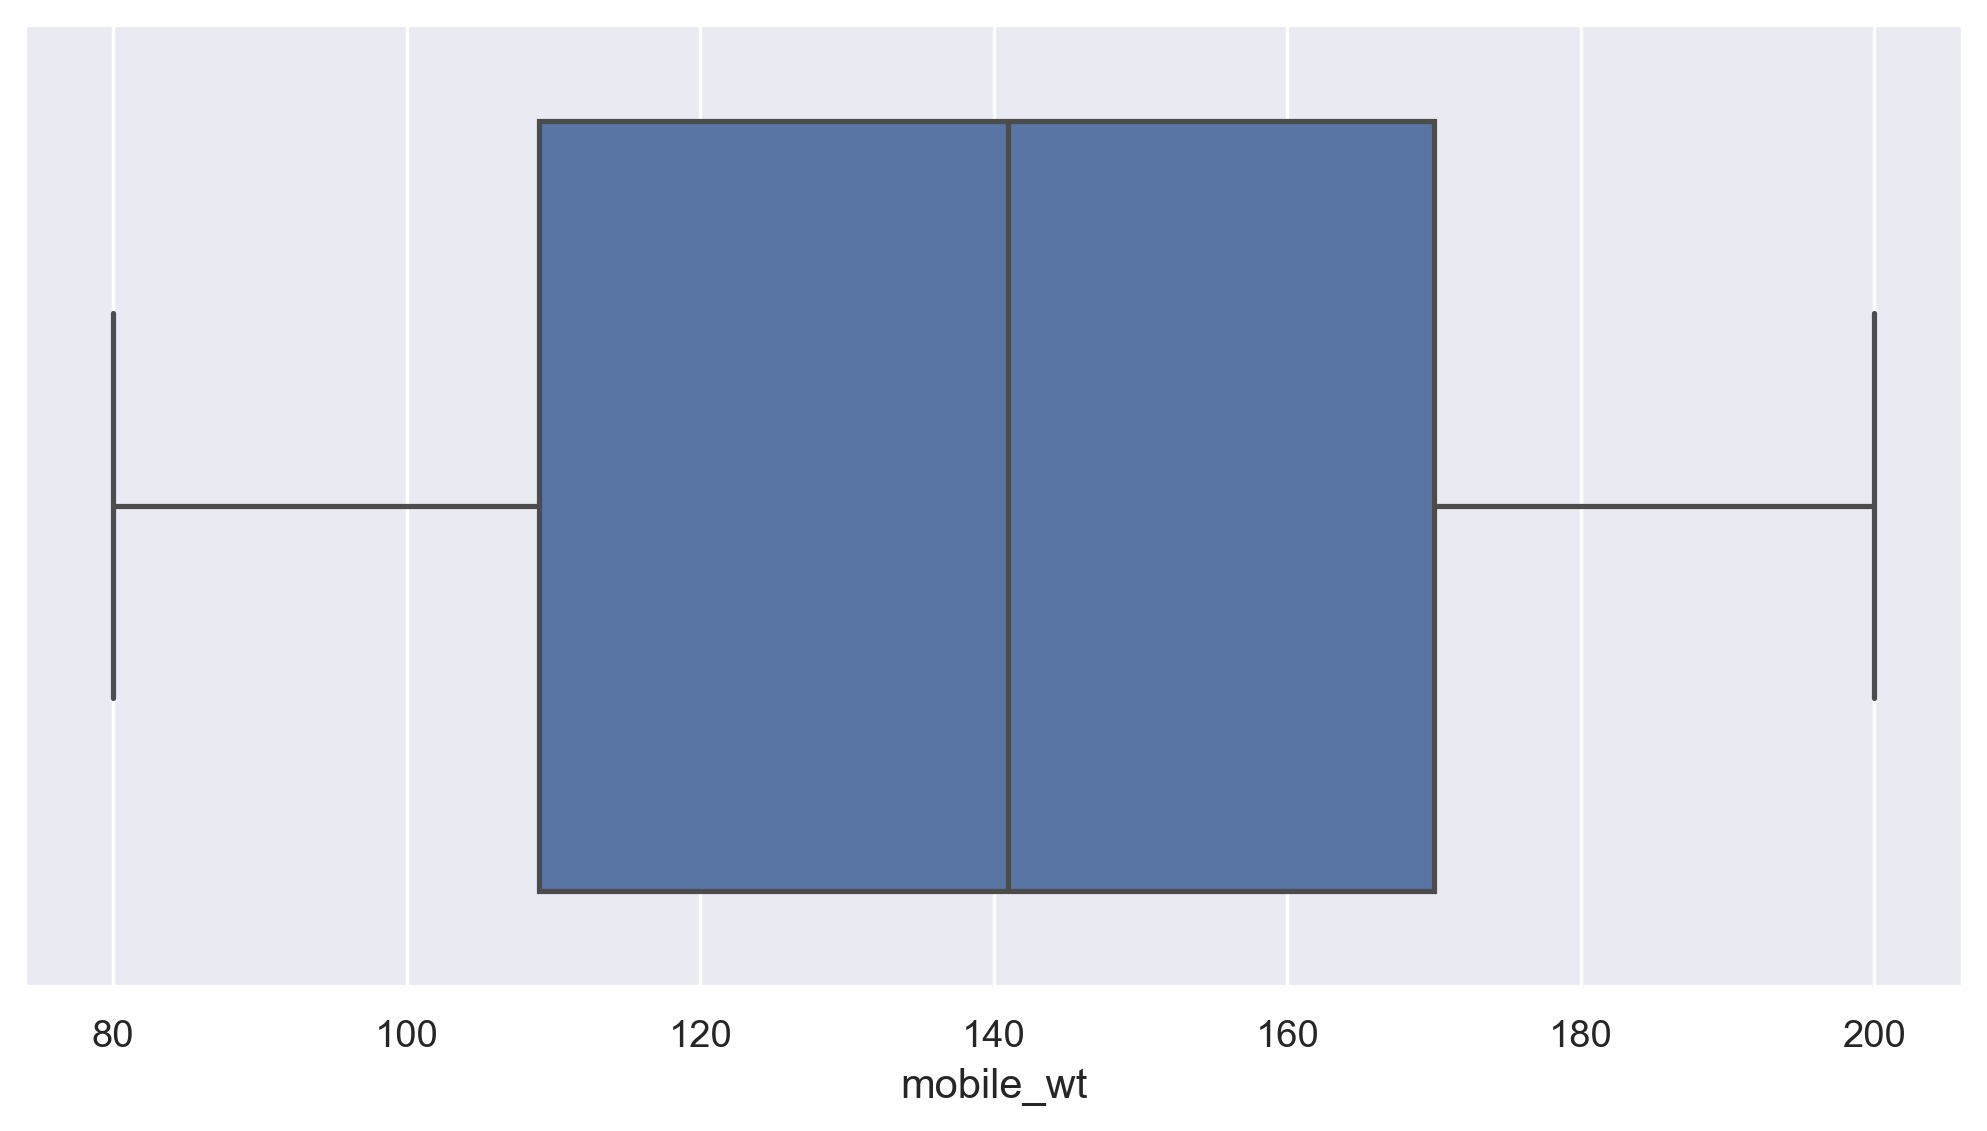

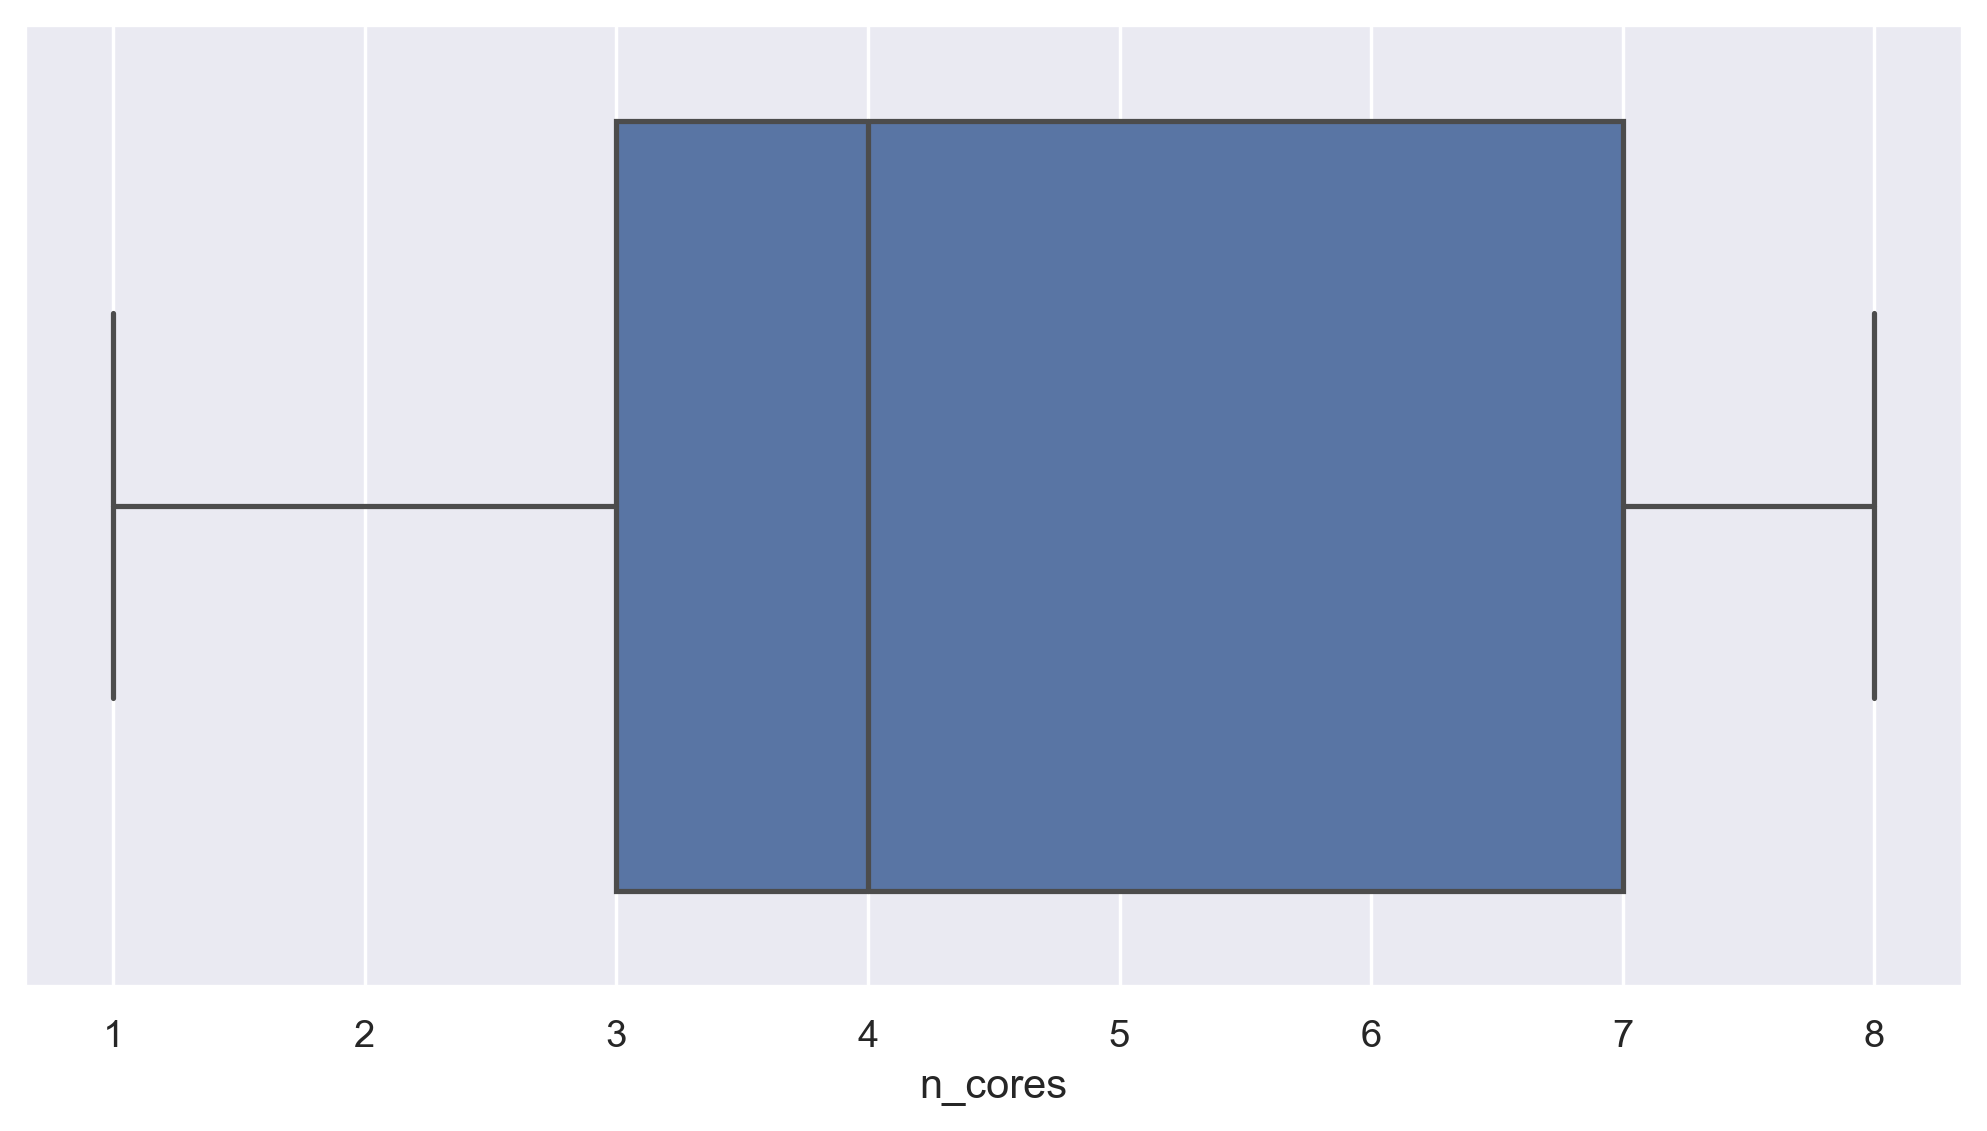

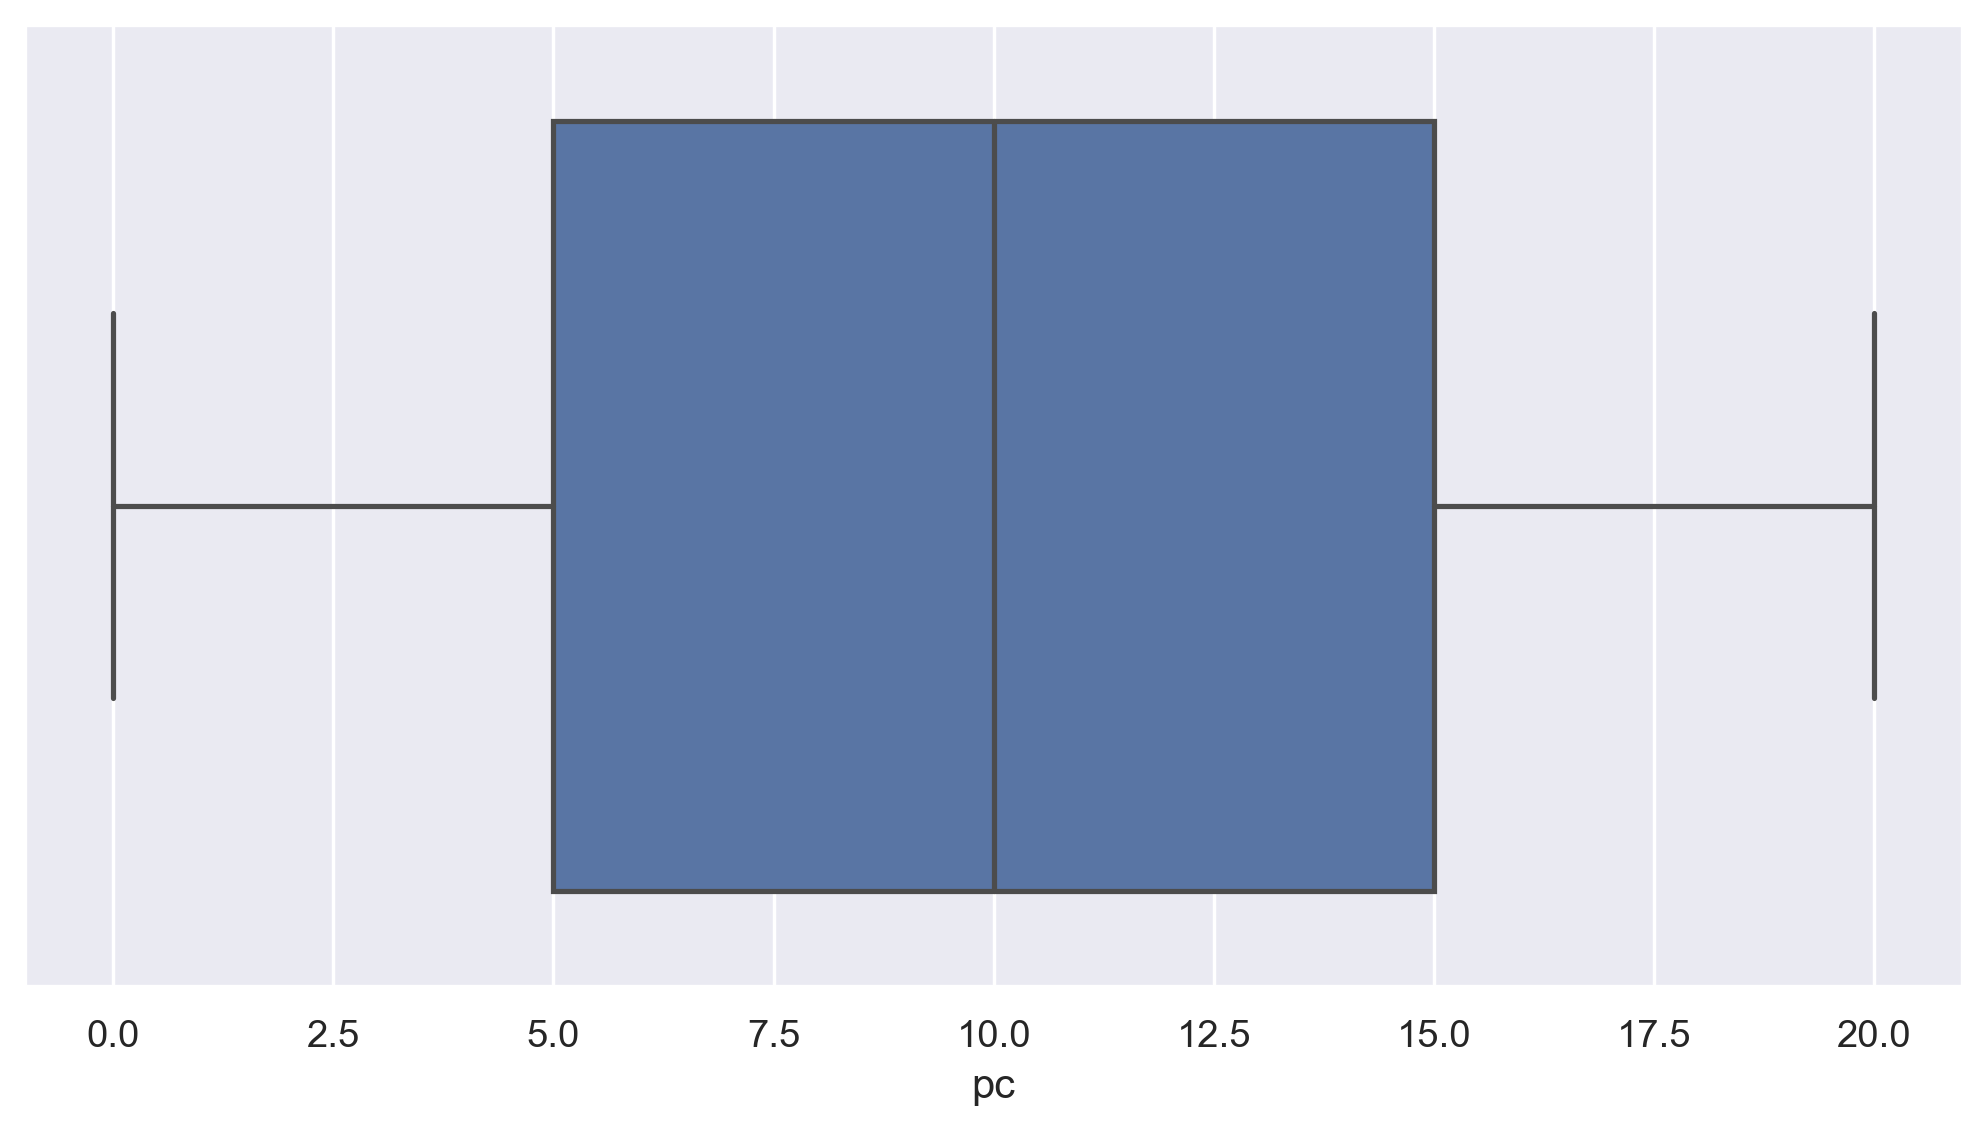

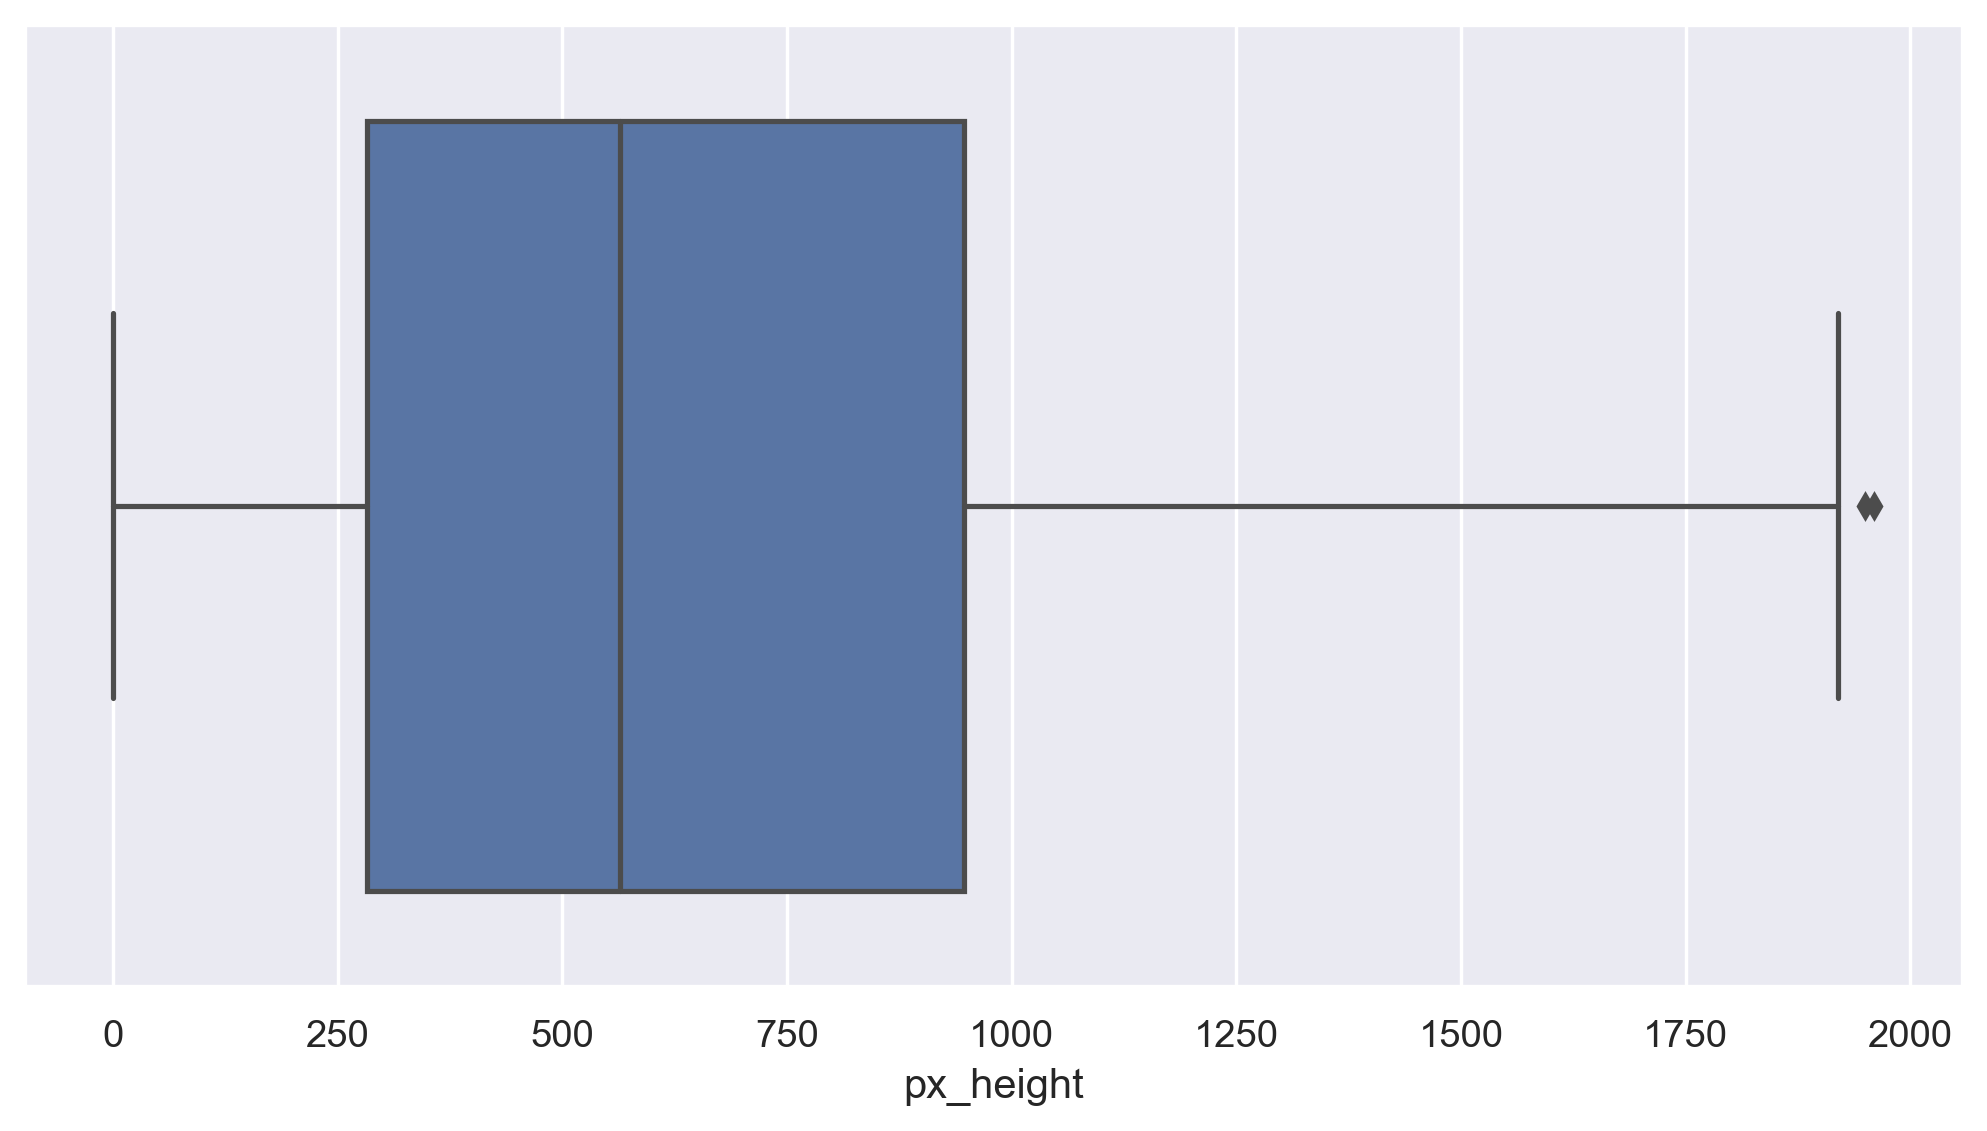

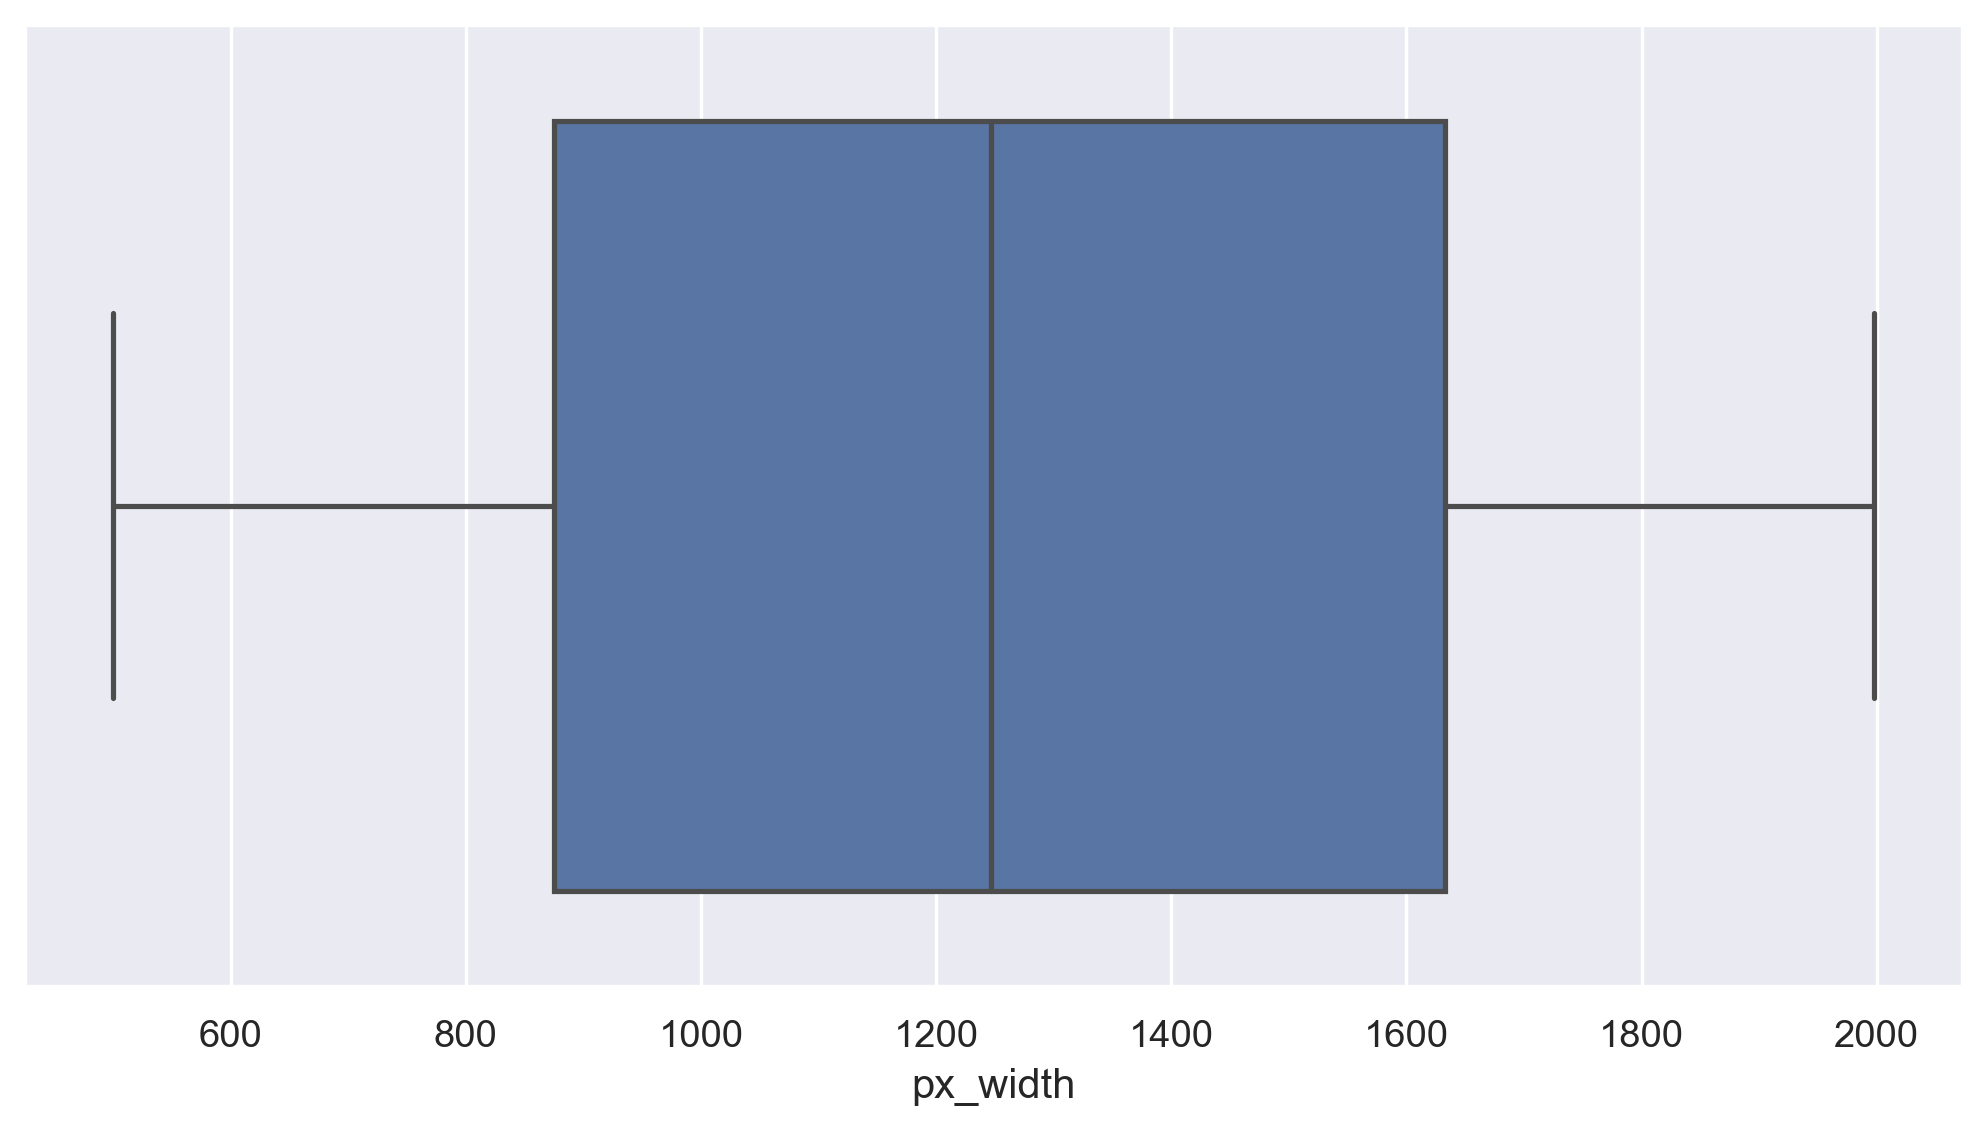

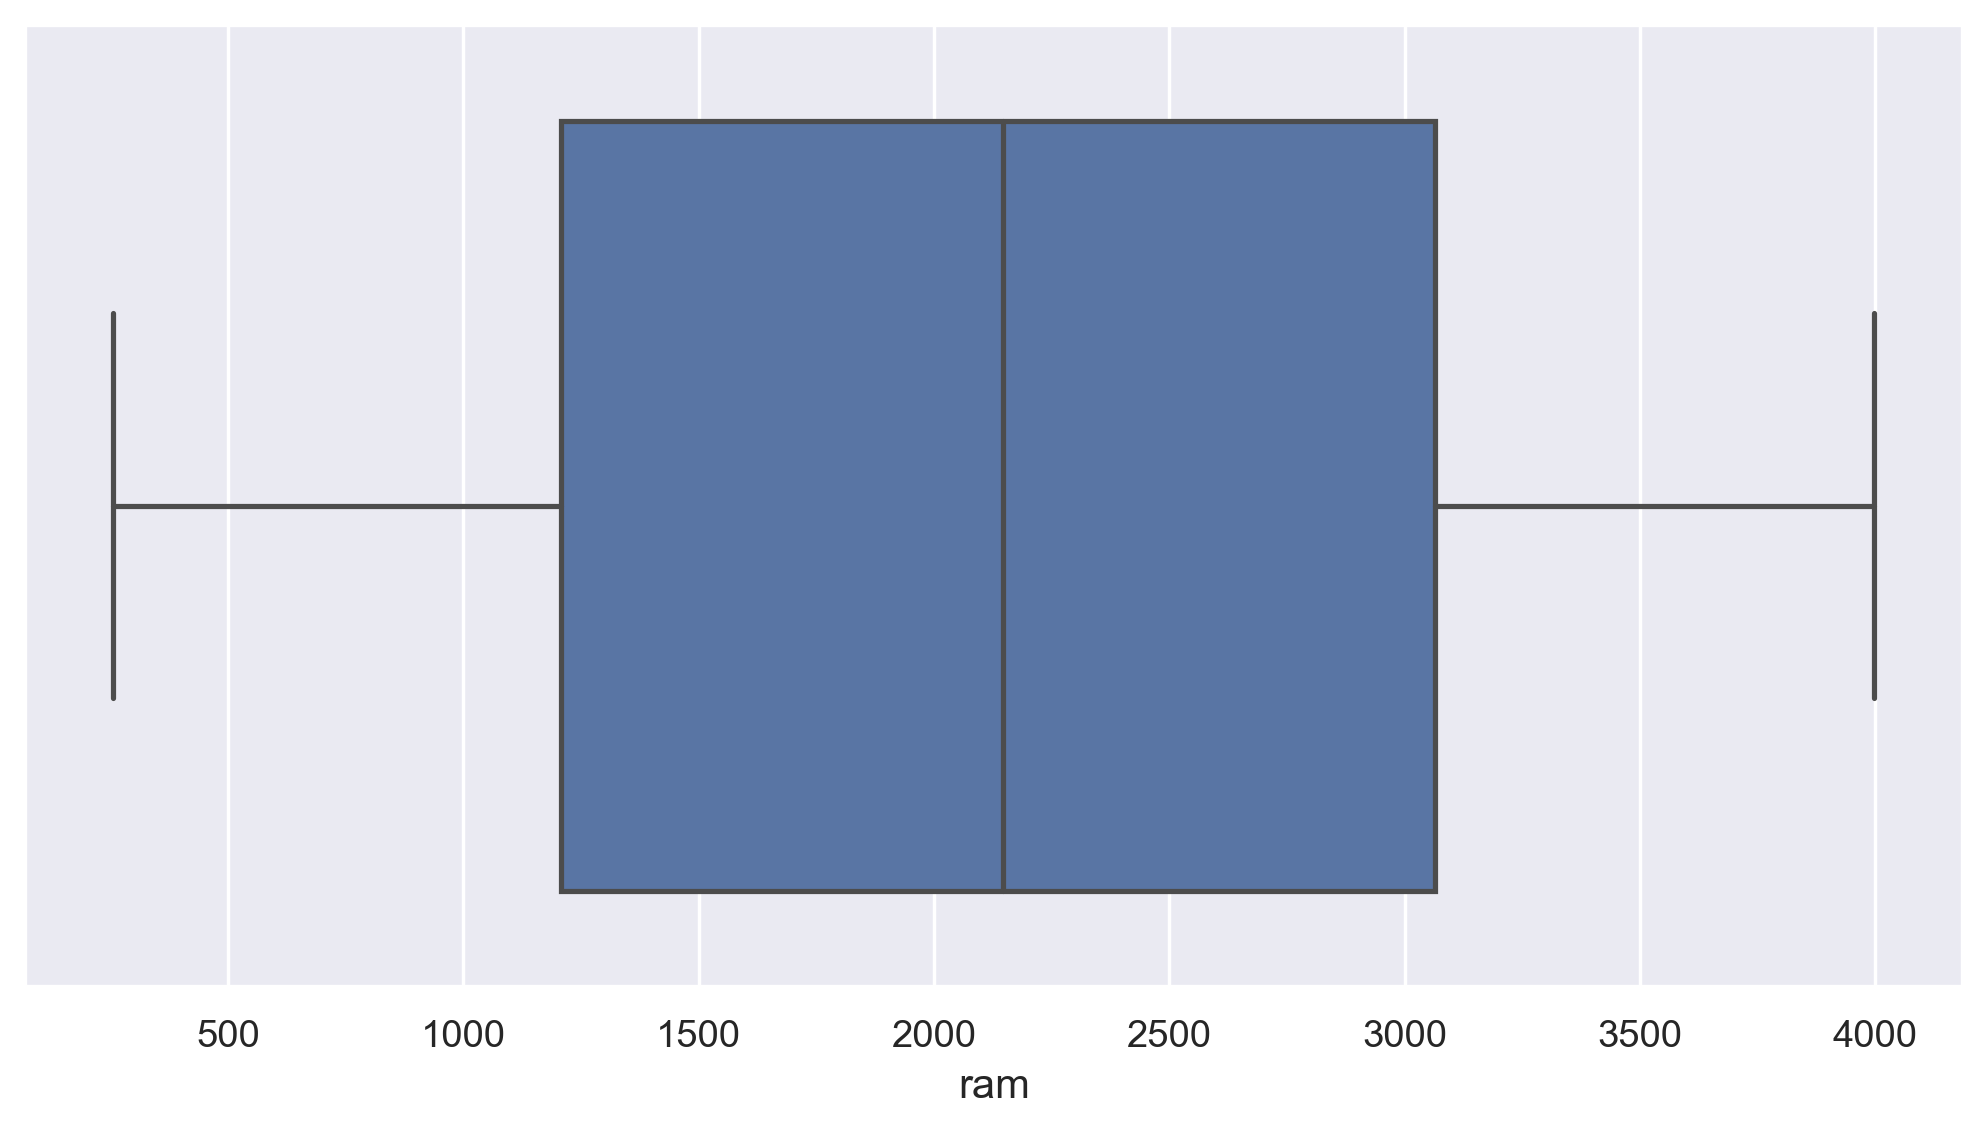

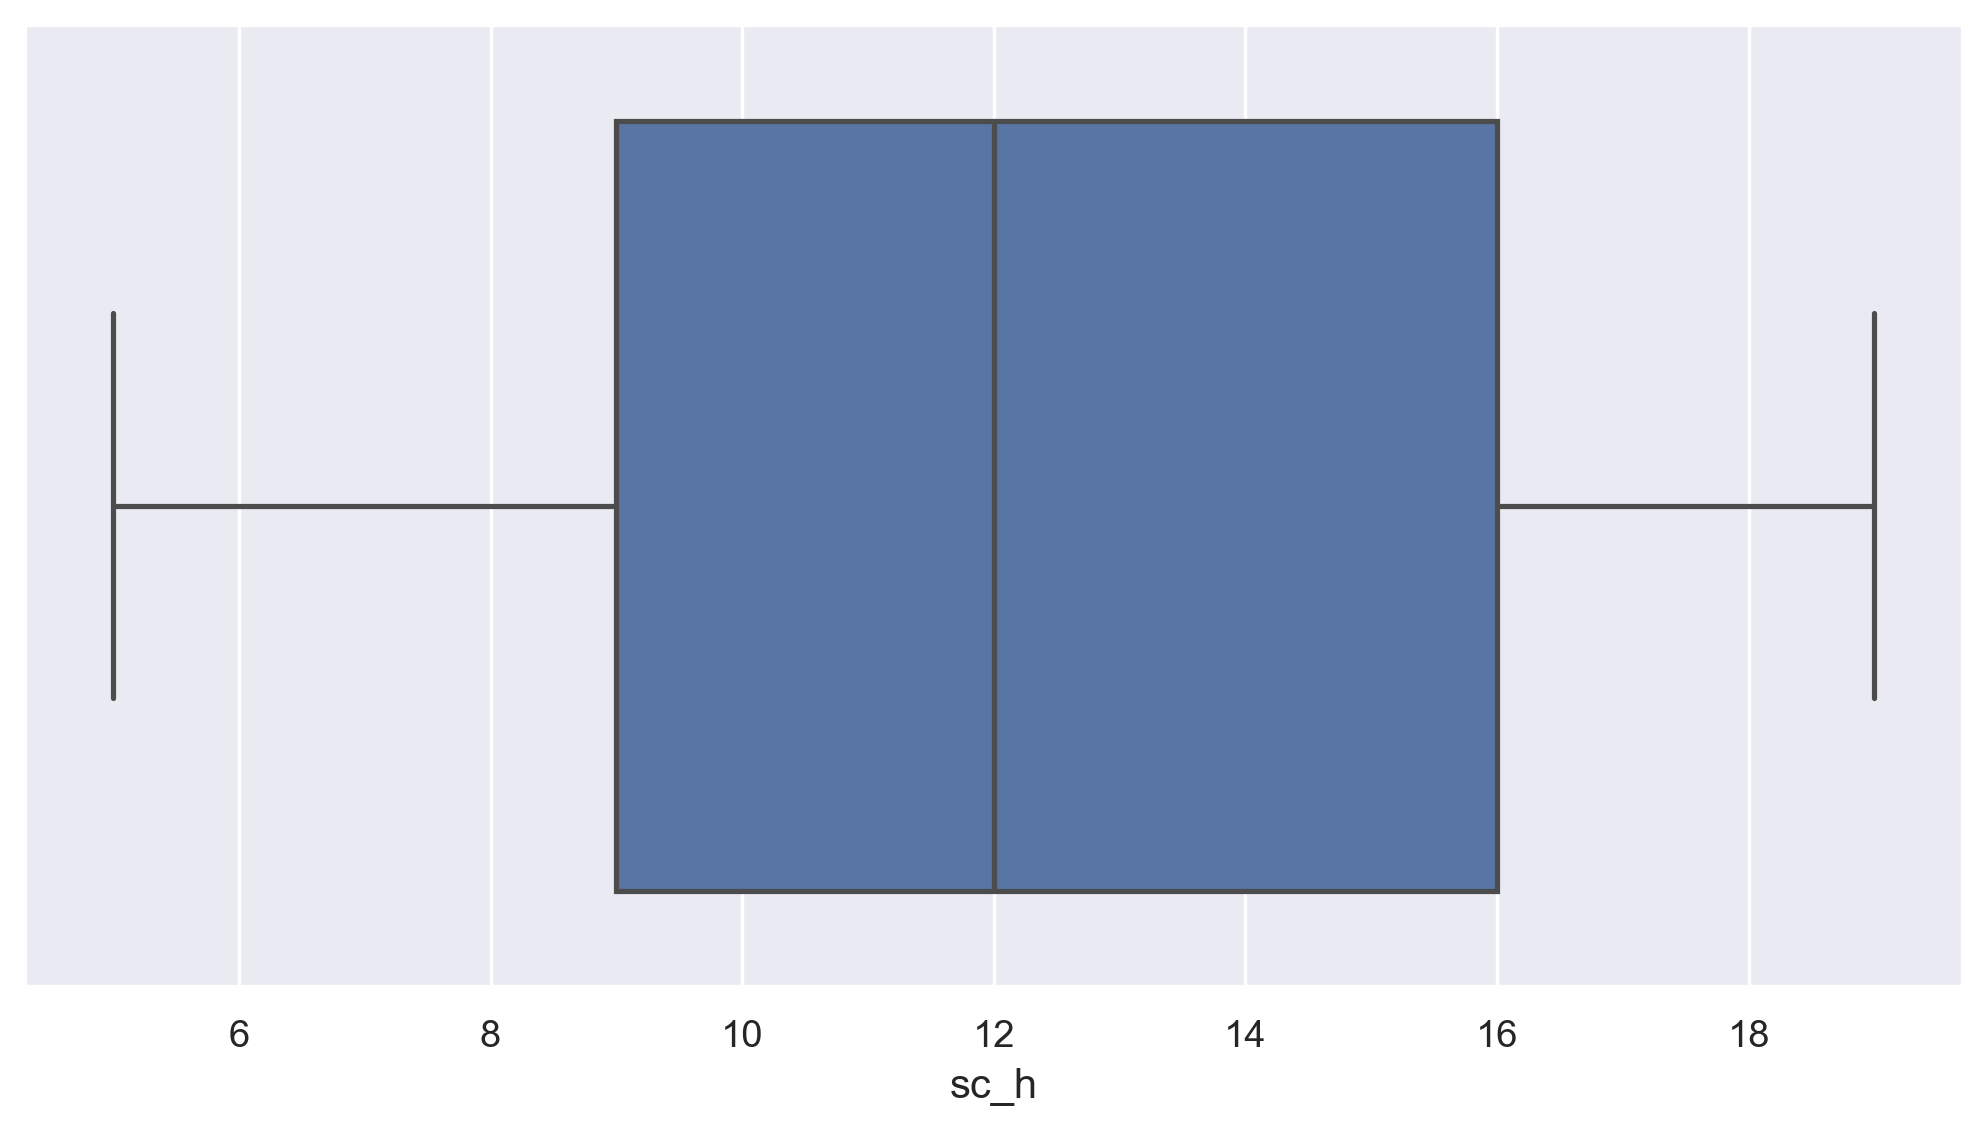

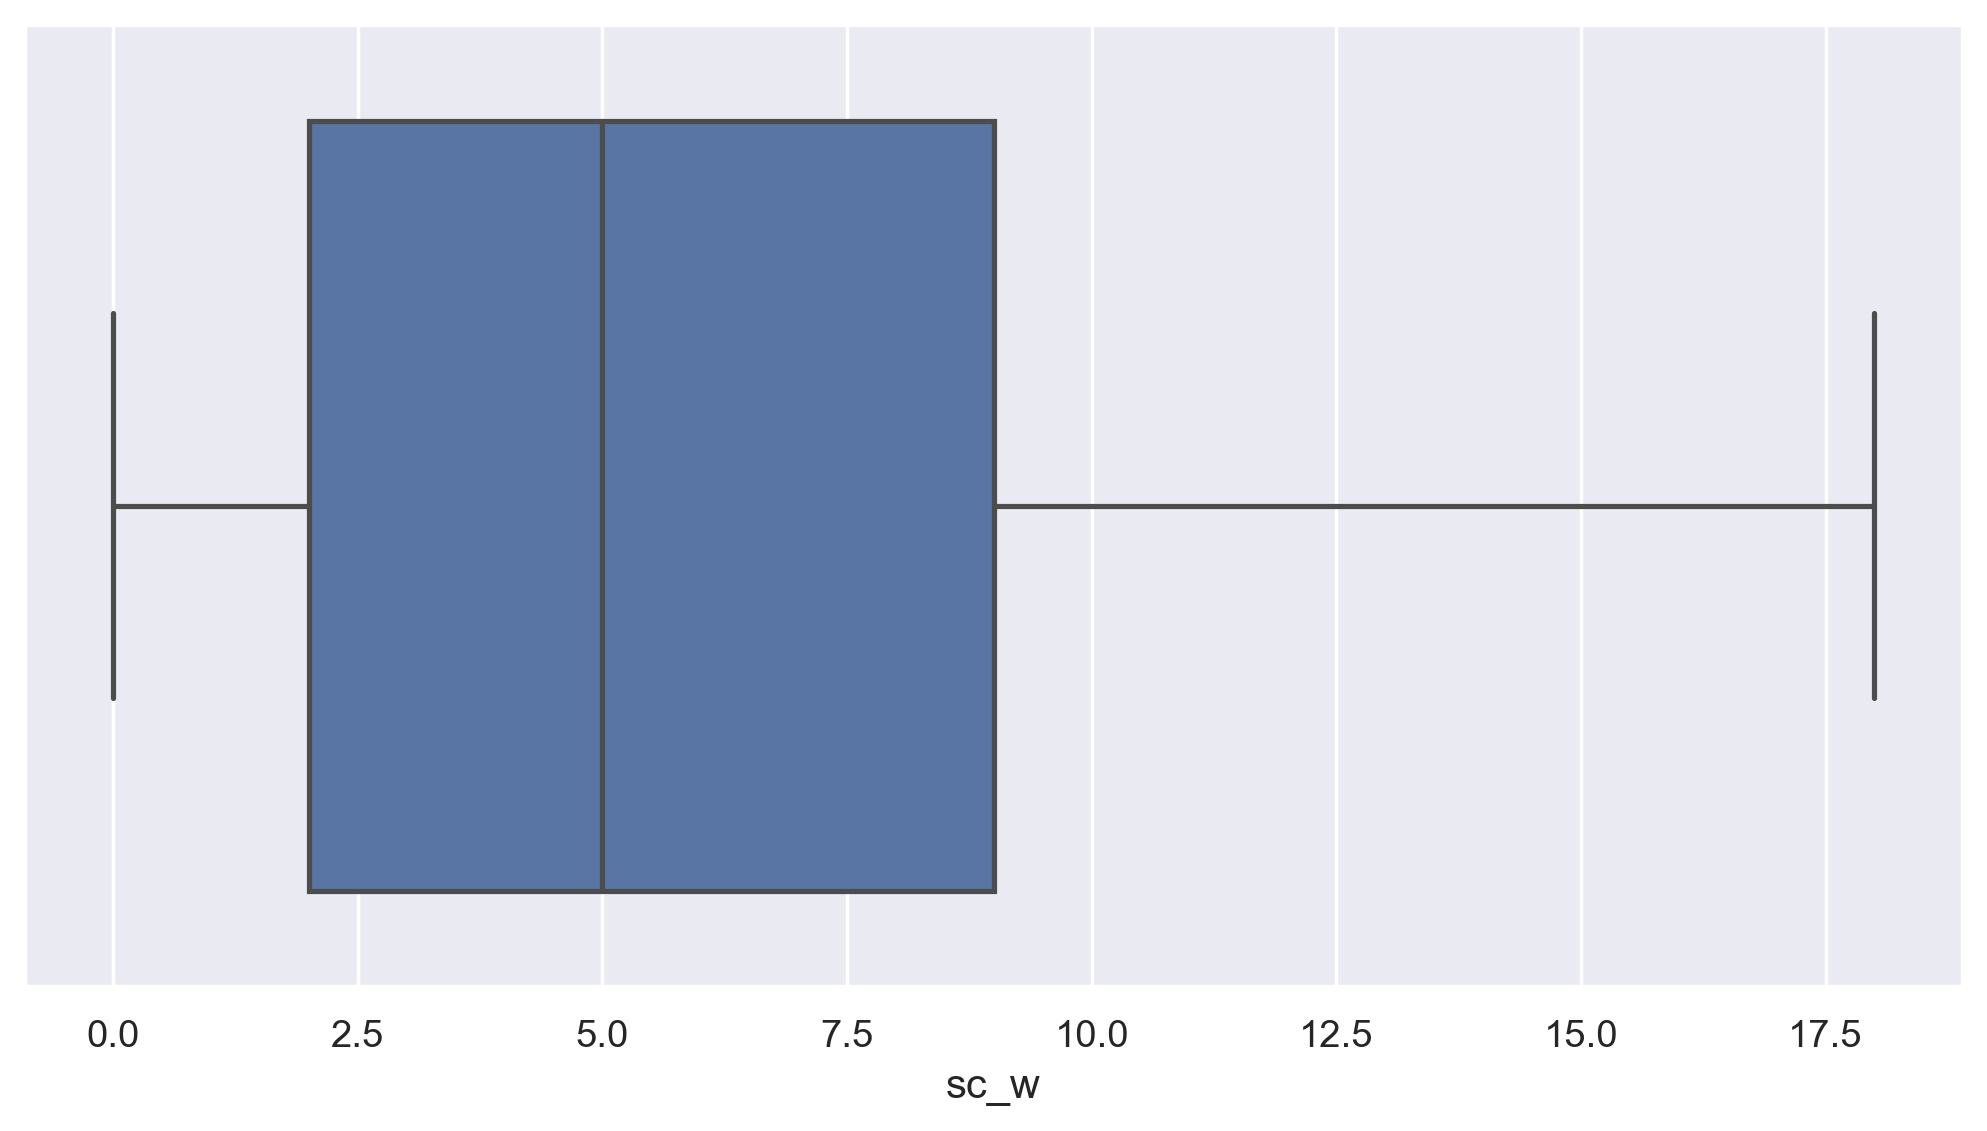

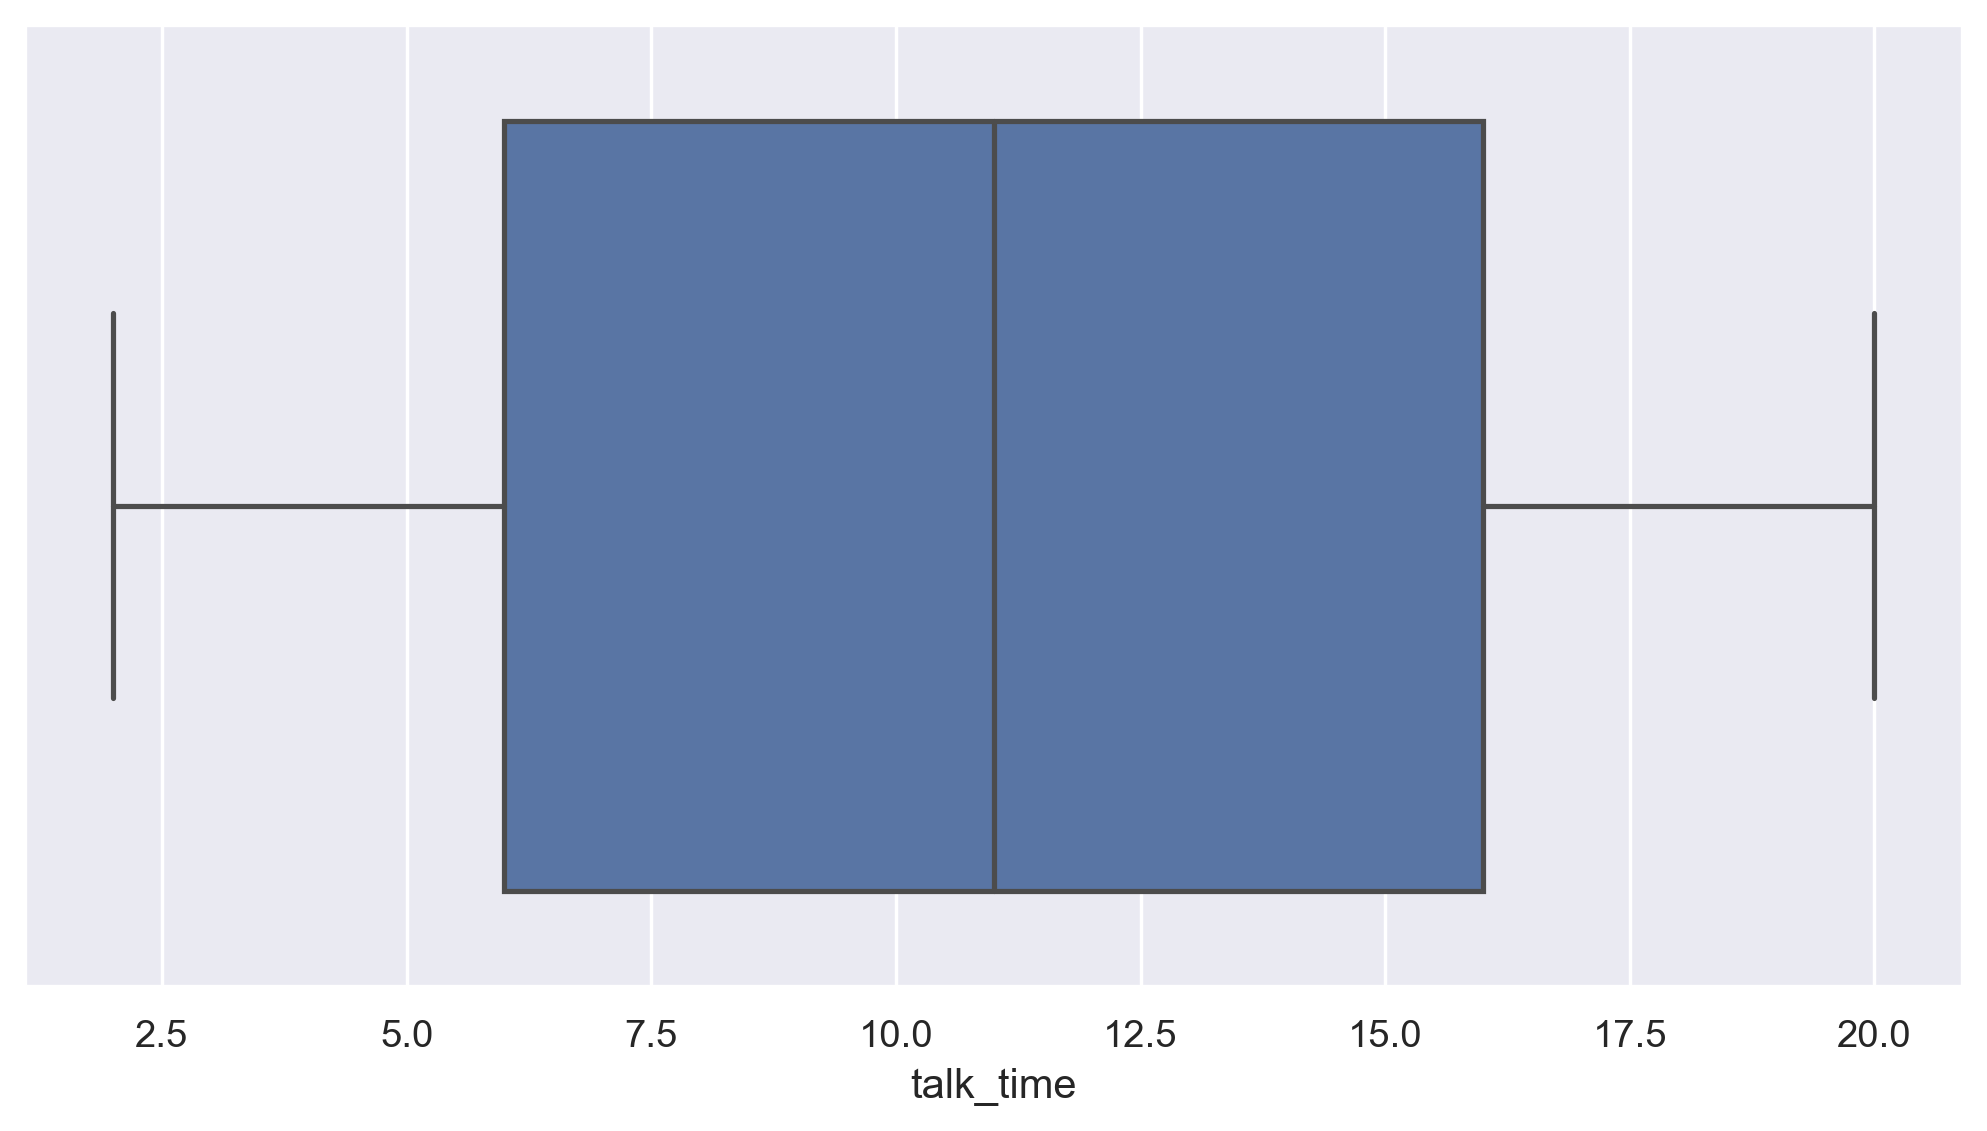

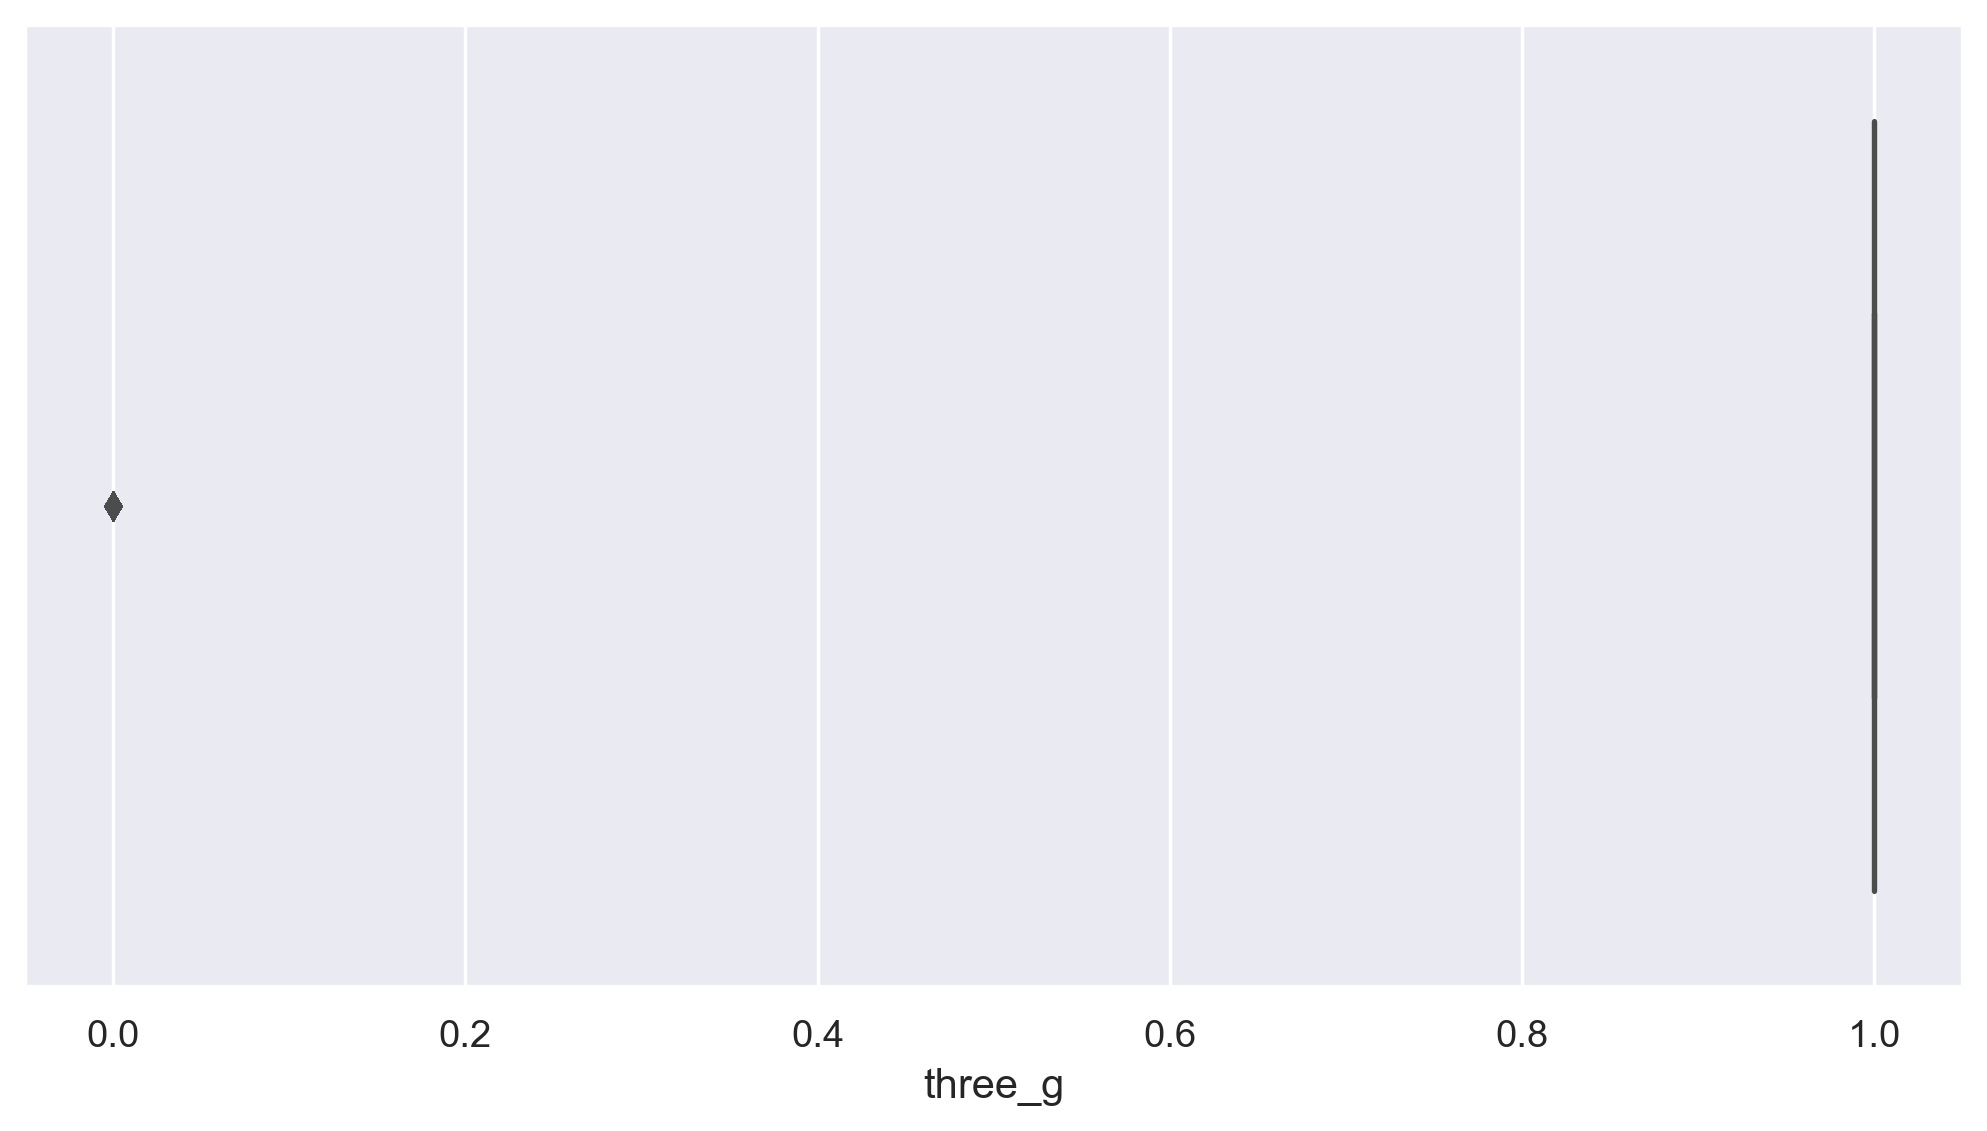

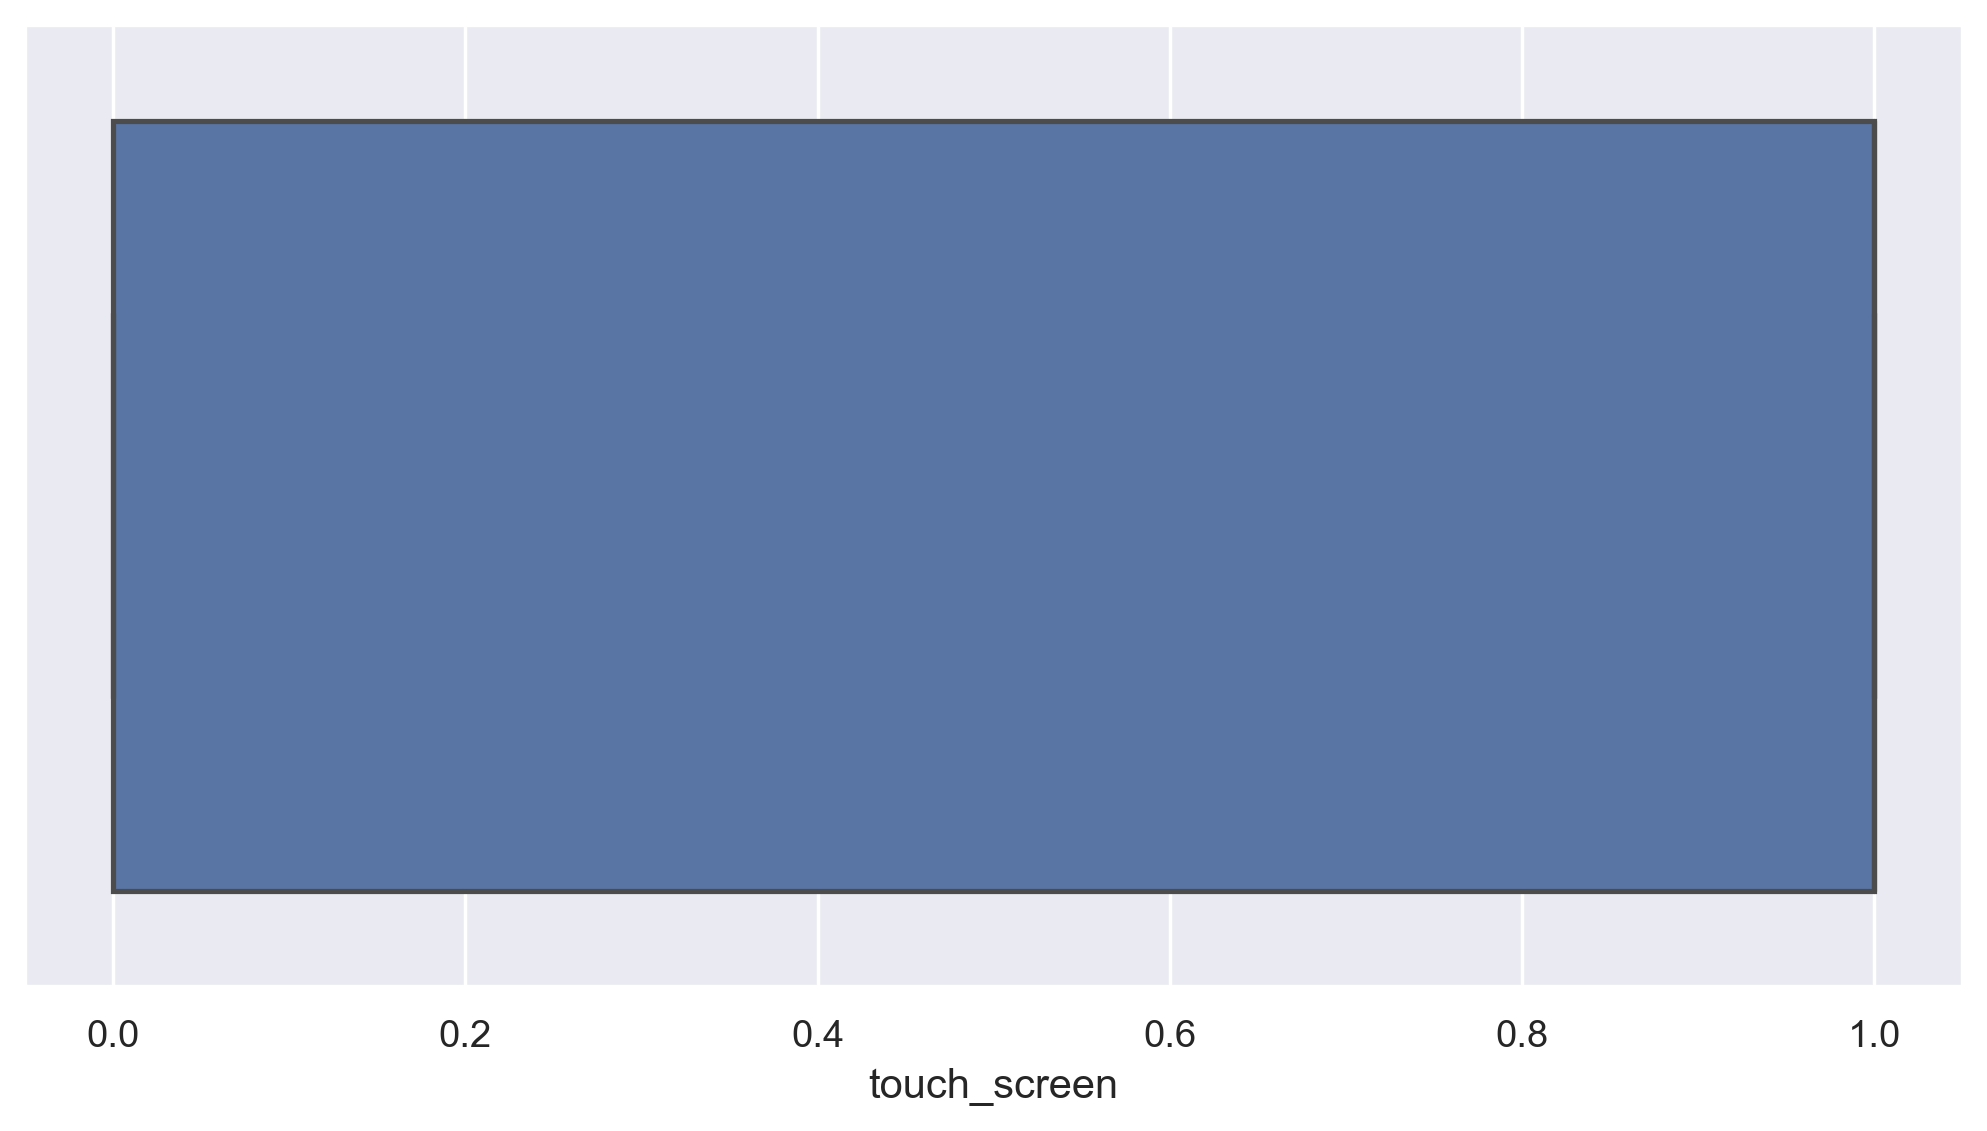

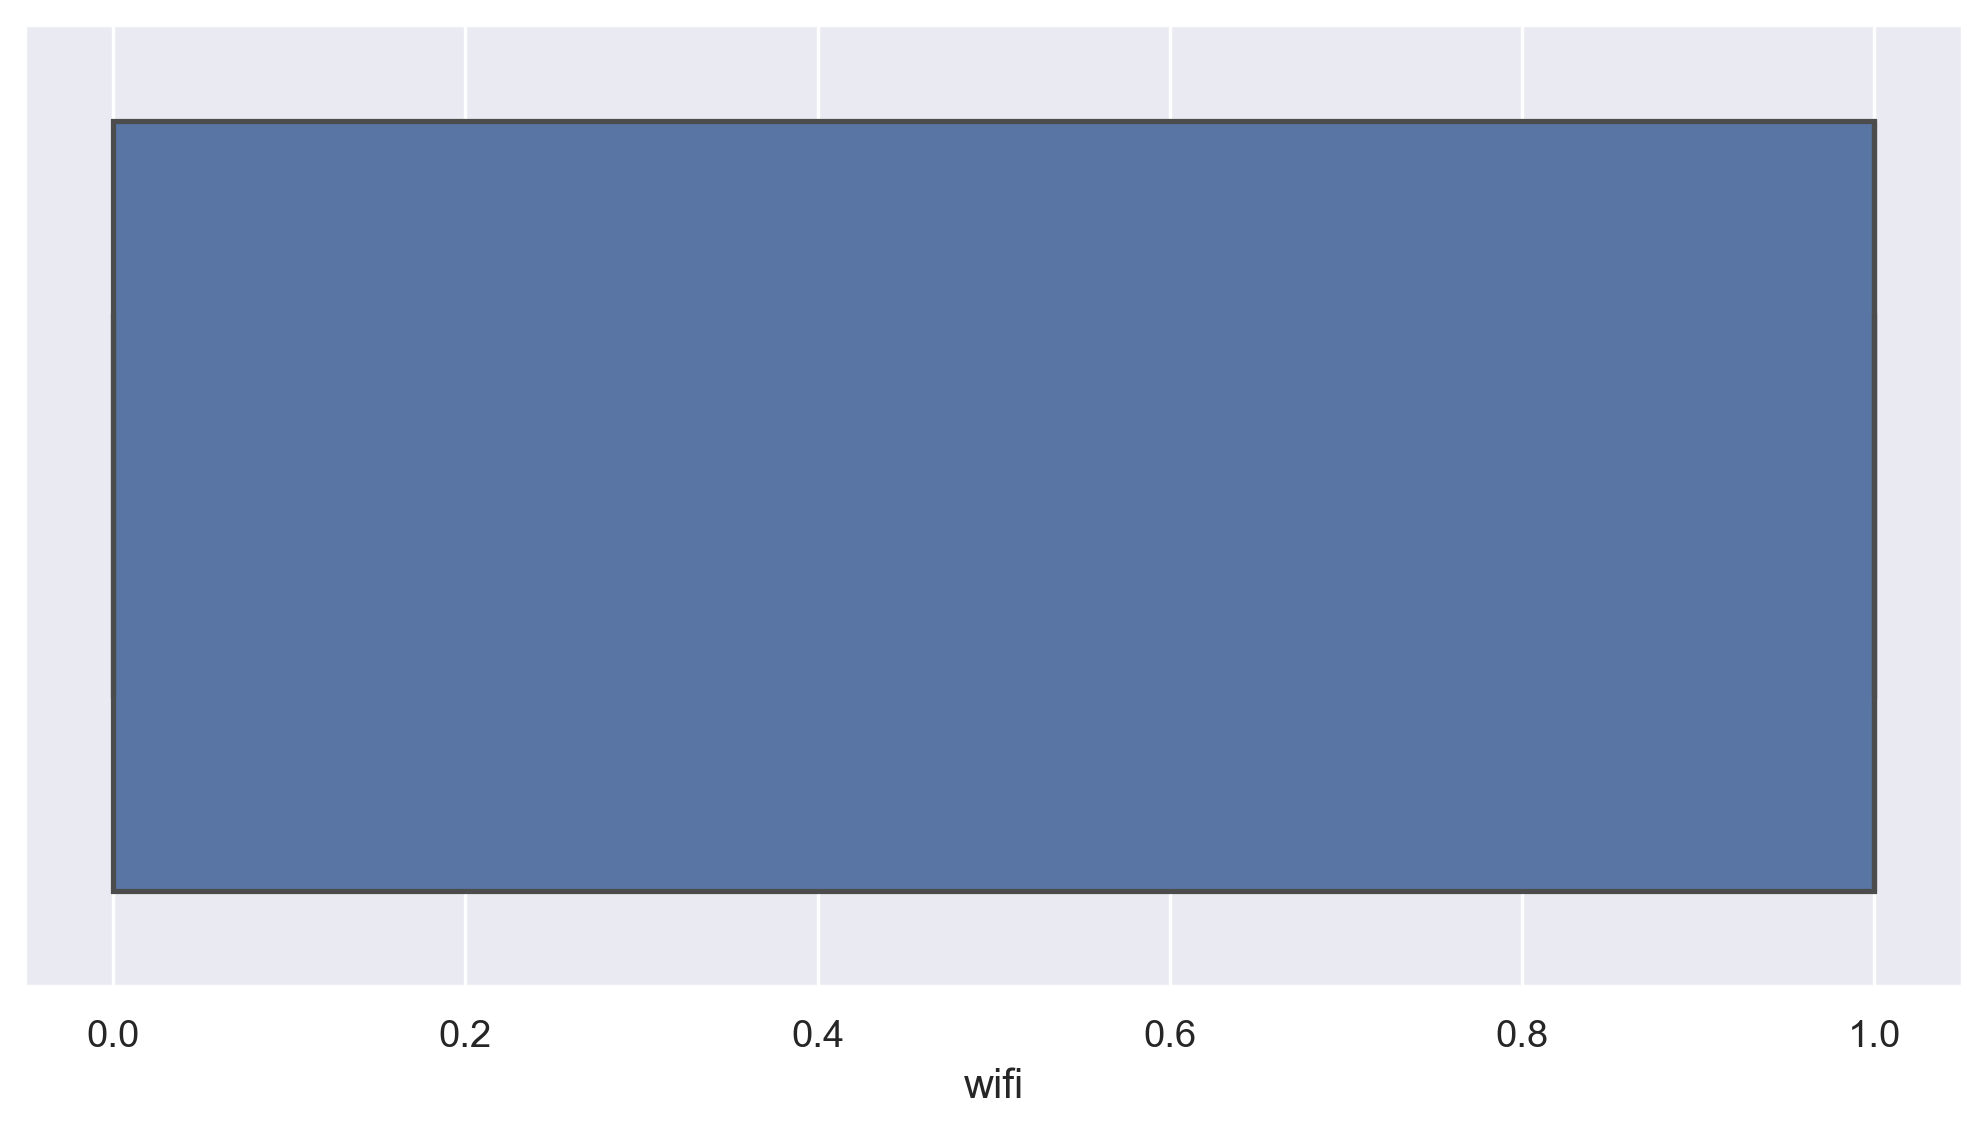

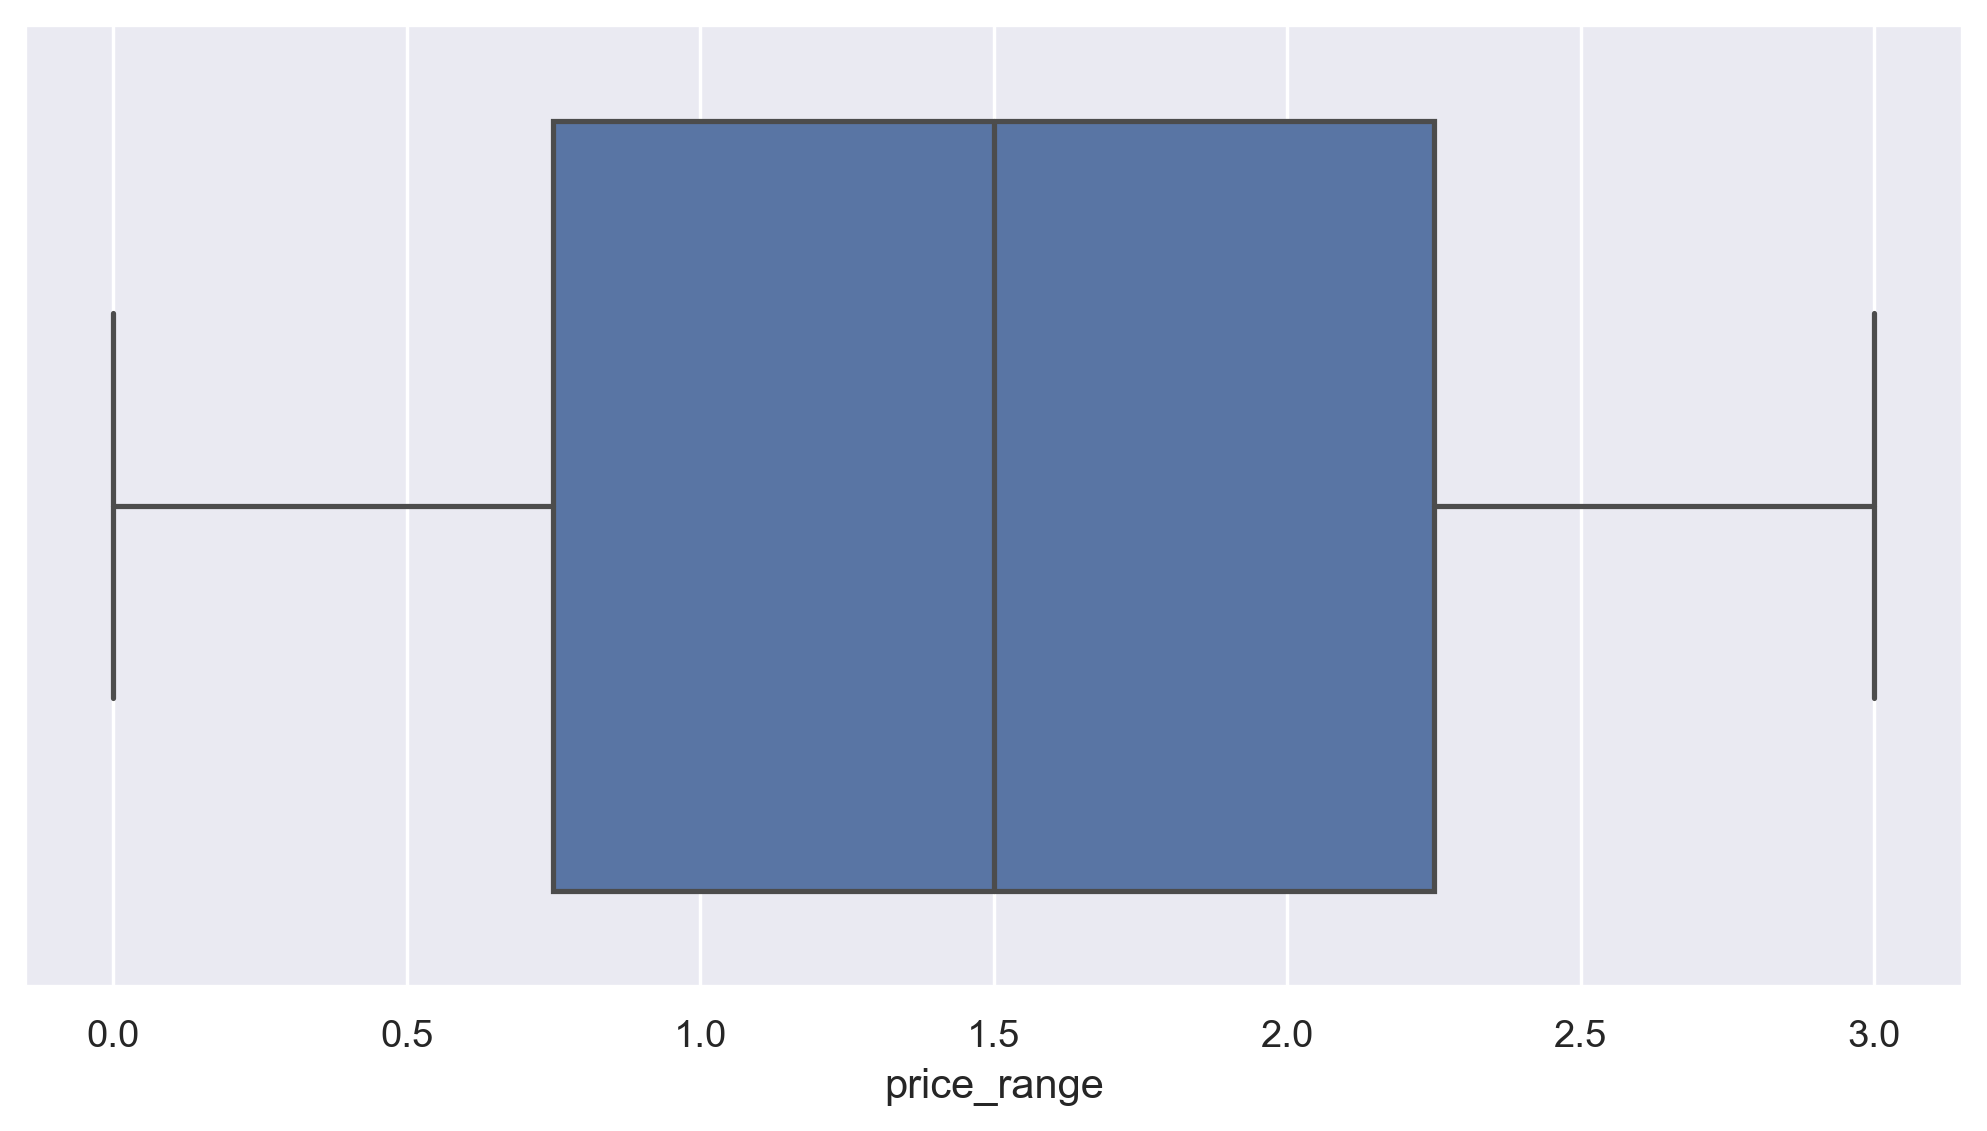

In [66]:
for i in train.columns:
    sns.boxplot(data = train,x = i)
    plt.show()

# Checking for Correlation

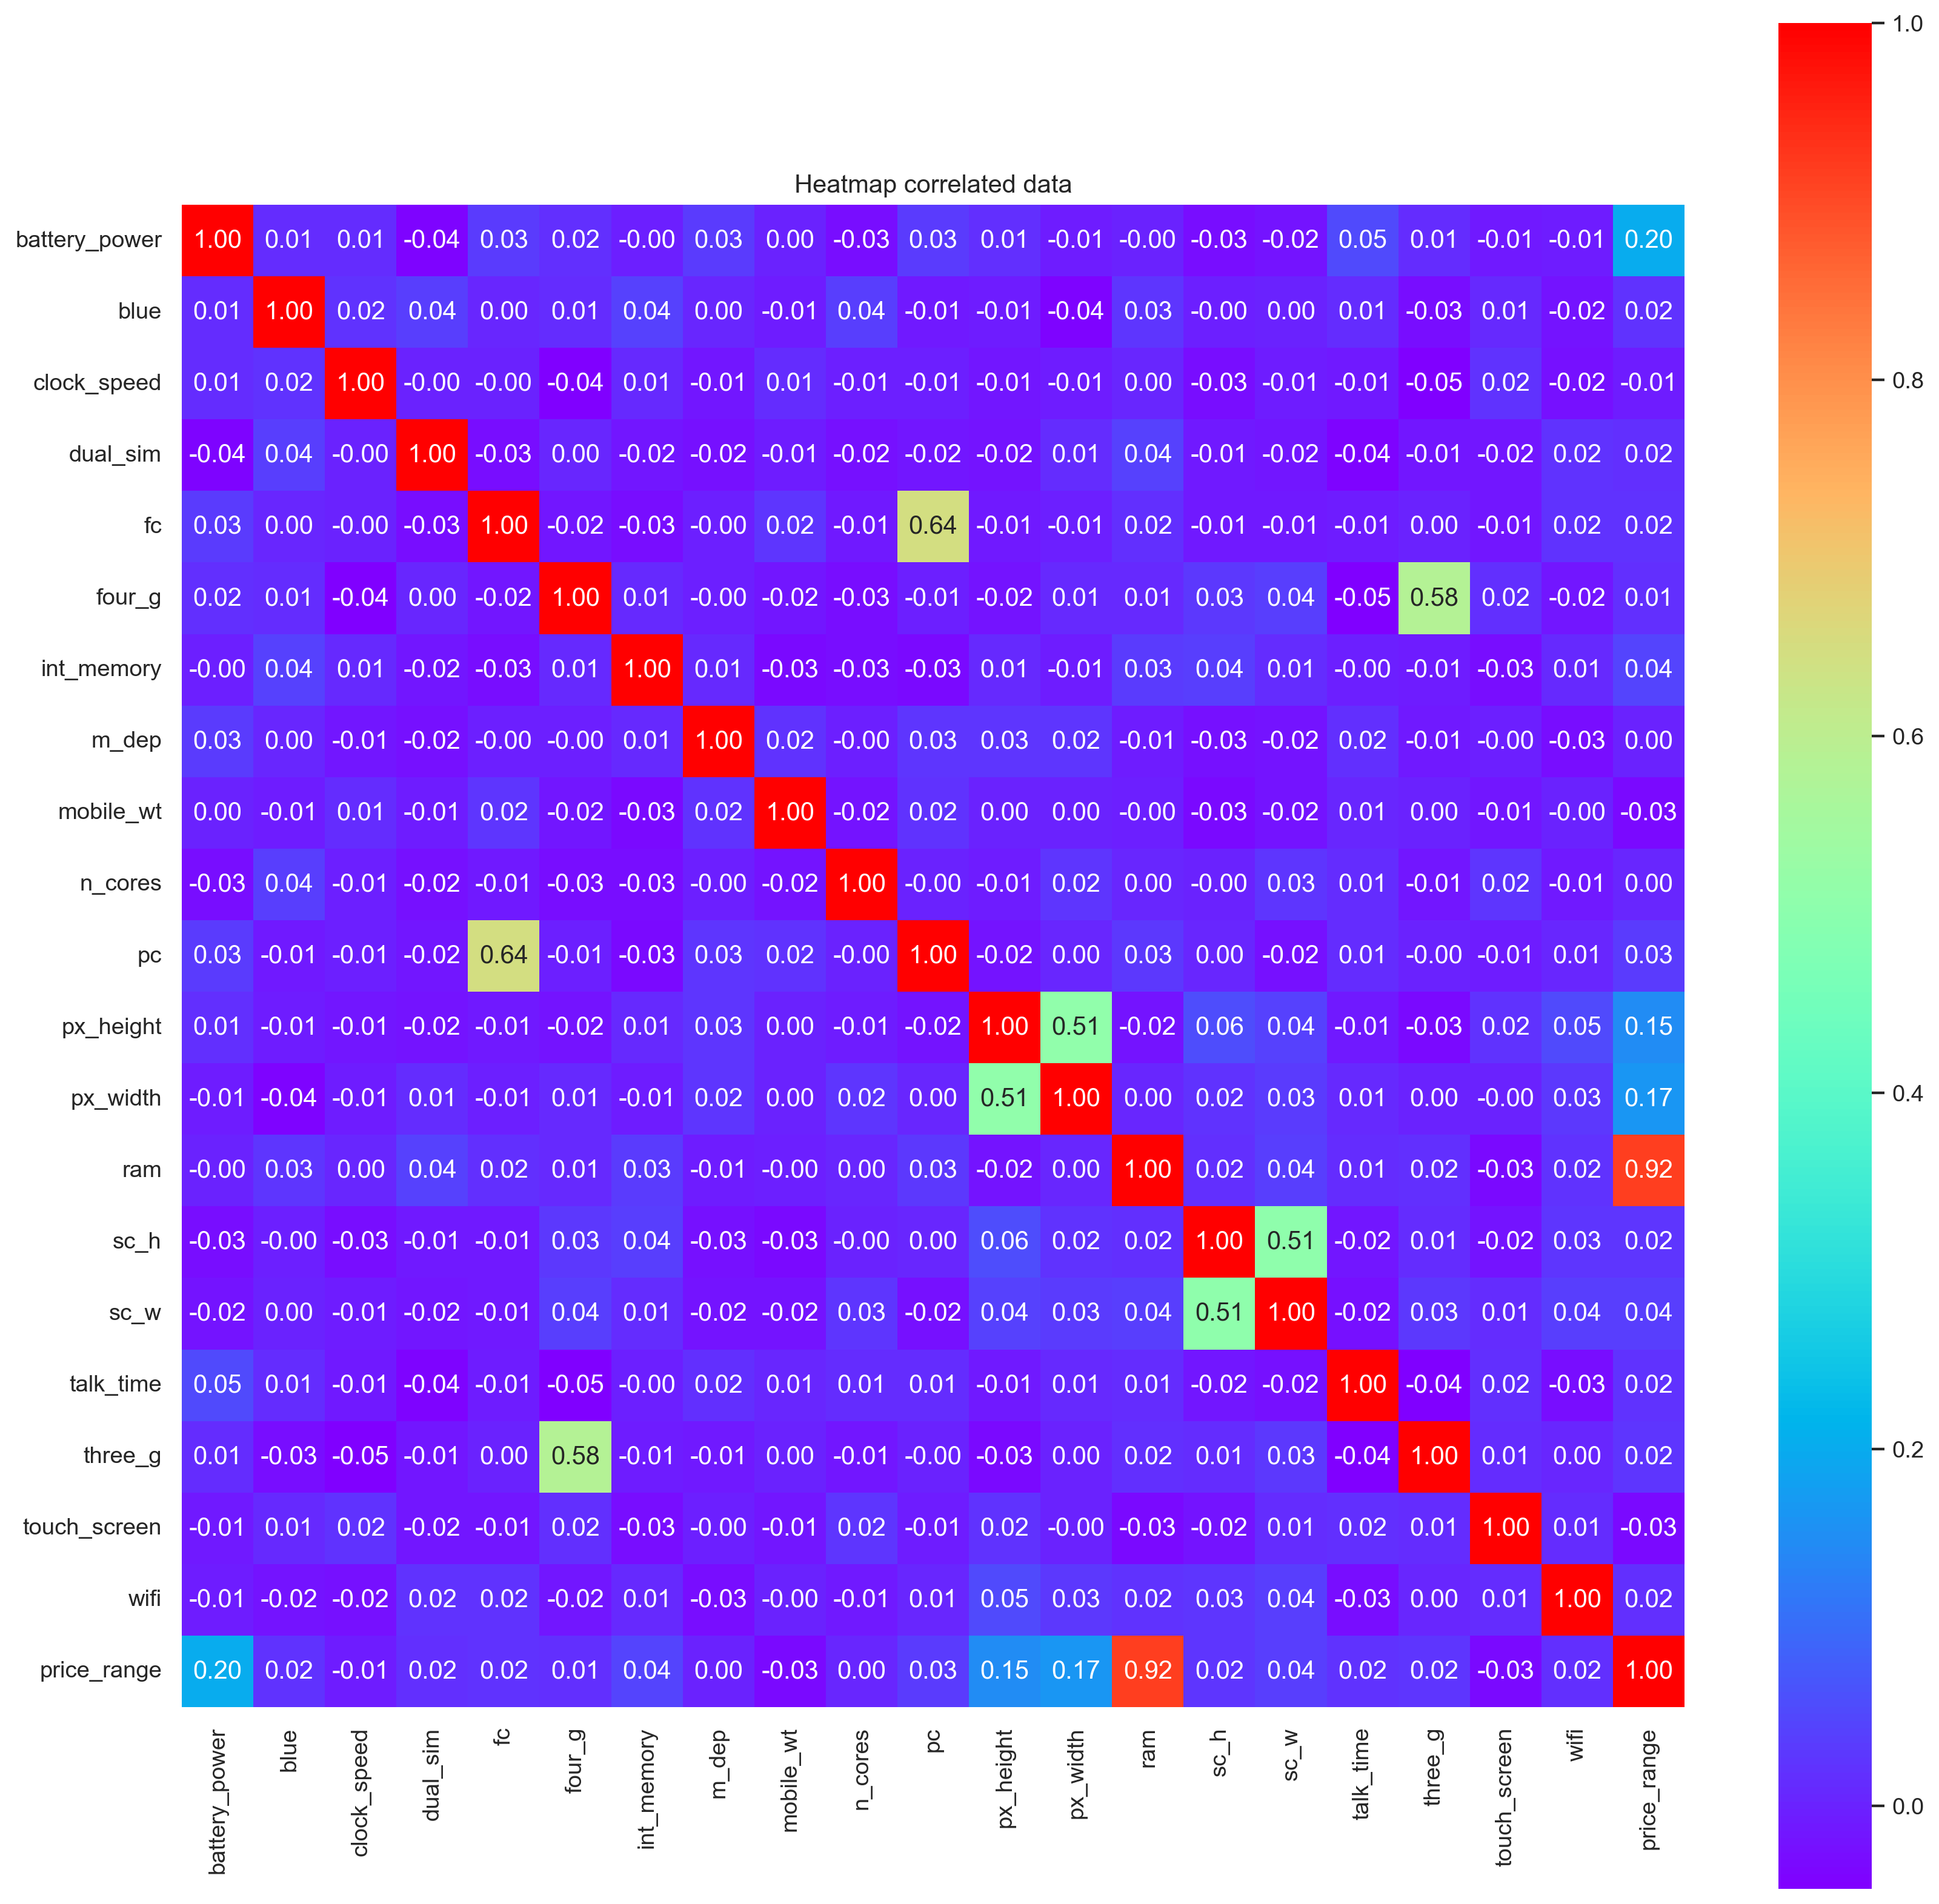

In [67]:
plt.figure(figsize=(16,16))
ax= plt.axes()
sns.heatmap(train.corr(),cmap = 'rainbow',cbar=True, annot=True, square=True, fmt='.2f',ax=ax)
ax.set_title('Heatmap correlated data')
plt.show()

# Feature Reduction 

In [68]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Considering the correlation value and some domain knowledge we shorlist few features which are important to predict the price of the mobile phones

In [69]:
train = train[['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h', 'dual_sim']] # top 10 correlated features with price_range

In [70]:
train.head()

,price_range,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,three_g,sc_h,dual_sim
0,1,2549,842,756,20,7,7,2,0,9,0
1,2,2631,1021,1988,905,53,3,6,1,17,1
2,2,2603,563,1716,1263,41,2,6,1,11,1
3,2,2769,615,1786,1216,10,8,9,1,16,0
4,1,1411,1821,1212,1208,44,2,14,1,8,0


# Feature Scaling

In [71]:
# Since no missing values, no outliers, no duplicates. we will now process the train data to predict the model

In [72]:
x = train.iloc[:,1:]
y = train['price_range']

In [73]:
x.head()

,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,three_g,sc_h,dual_sim
0,2549,842,756,20,7,7,2,0,9,0
1,2631,1021,1988,905,53,3,6,1,17,1
2,2603,563,1716,1263,41,2,6,1,11,1
3,2769,615,1786,1216,10,8,9,1,16,0
4,1411,1821,1212,1208,44,2,14,1,8,0


In [74]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [76]:
sc = StandardScaler()

In [75]:
#Standardization of the dataset
from sklearn.preprocessing import StandardScaler

In [77]:
train = sc.fit_transform(x_train)

In [78]:
#Importing to split training and testing data
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [80]:
x_train.head()

,ram,battery_power,px_width,px_height,int_memory,sc_w,pc,three_g,sc_h,dual_sim
582,1257,1232,809,361,24,10,17,1,16,1
159,1078,1840,1545,311,34,0,16,0,8,1
1827,3779,1692,1904,1899,2,3,17,1,9,0
318,663,508,557,39,42,12,8,1,13,0
708,3714,977,1862,1502,35,3,15,0,19,1


# Model Building

In [81]:
#Importing libraries required to build and evaluate model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [82]:
logit = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
br = BaggingClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()
svr = SVC()
lgm = LGBMClassifier()
cat = CatBoostClassifier()
model = [logit,dt,rf,br,ada,gbr,xgb,knn,svr,lgm,cat]

In [83]:
for i in model:
    print(i)
    i.fit(x_train, y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    print("Confusion Matrix")
    c = confusion_matrix(y_test, y_pred_test)
    print(c)
    print('\n')
    print("classification_report")
    d = classification_report(y_test, y_pred_test)
    print(d)
    print('\n')
    print("Training Accuracy", accuracy_score(y_train, y_pred_train))
    print("****************"*5)
    print("Test Accuracy", accuracy_score(y_test, y_pred_test))
    print("__"*5)
    print('\n')
    print('\n')

LogisticRegression()
Confusion Matrix
[[77 15  3  0]
 [16 44 21 11]
 [ 1 25 27 46]
 [ 0  8 20 86]]


classification_report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.48      0.48      0.48        92
           2       0.38      0.27      0.32        99
           3       0.60      0.75      0.67       114

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.57      0.58      0.57       400



Training Accuracy 0.576875
********************************************************************************
Test Accuracy 0.585
__________




DecisionTreeClassifier()
Confusion Matrix
[[ 88   7   0   0]
 [  8  74  10   0]
 [  0  13  72  14]
 [  0   0  10 104]]


classification_report
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.79      0.80      0.80  

40:	learn: 0.3164104	total: 375ms	remaining: 8.76s
41:	learn: 0.3095949	total: 379ms	remaining: 8.64s
42:	learn: 0.3061256	total: 383ms	remaining: 8.53s
43:	learn: 0.3016365	total: 389ms	remaining: 8.44s
44:	learn: 0.2990274	total: 393ms	remaining: 8.34s
45:	learn: 0.2961432	total: 397ms	remaining: 8.24s
46:	learn: 0.2925436	total: 401ms	remaining: 8.14s
47:	learn: 0.2884768	total: 405ms	remaining: 8.04s
48:	learn: 0.2846633	total: 409ms	remaining: 7.94s
49:	learn: 0.2818425	total: 414ms	remaining: 7.86s
50:	learn: 0.2779175	total: 418ms	remaining: 7.78s
51:	learn: 0.2752521	total: 422ms	remaining: 7.7s
52:	learn: 0.2716187	total: 427ms	remaining: 7.62s
53:	learn: 0.2700380	total: 431ms	remaining: 7.54s
54:	learn: 0.2665993	total: 435ms	remaining: 7.47s
55:	learn: 0.2635953	total: 439ms	remaining: 7.4s
56:	learn: 0.2617574	total: 443ms	remaining: 7.33s
57:	learn: 0.2602273	total: 447ms	remaining: 7.26s
58:	learn: 0.2574355	total: 451ms	remaining: 7.19s
59:	learn: 0.2545122	total: 455ms

219:	learn: 0.1039105	total: 1.19s	remaining: 4.23s
220:	learn: 0.1034075	total: 1.2s	remaining: 4.22s
221:	learn: 0.1029754	total: 1.2s	remaining: 4.22s
222:	learn: 0.1025605	total: 1.21s	remaining: 4.21s
223:	learn: 0.1022701	total: 1.21s	remaining: 4.2s
224:	learn: 0.1018816	total: 1.22s	remaining: 4.2s
225:	learn: 0.1014555	total: 1.22s	remaining: 4.19s
226:	learn: 0.1009650	total: 1.23s	remaining: 4.19s
227:	learn: 0.1003840	total: 1.24s	remaining: 4.19s
228:	learn: 0.1000305	total: 1.24s	remaining: 4.18s
229:	learn: 0.0996930	total: 1.25s	remaining: 4.17s
230:	learn: 0.0995154	total: 1.25s	remaining: 4.17s
231:	learn: 0.0993153	total: 1.26s	remaining: 4.17s
232:	learn: 0.0989145	total: 1.26s	remaining: 4.16s
233:	learn: 0.0986564	total: 1.27s	remaining: 4.16s
234:	learn: 0.0982982	total: 1.27s	remaining: 4.15s
235:	learn: 0.0980495	total: 1.28s	remaining: 4.14s
236:	learn: 0.0977868	total: 1.28s	remaining: 4.14s
237:	learn: 0.0974817	total: 1.29s	remaining: 4.13s
238:	learn: 0.09

400:	learn: 0.0617629	total: 2s	remaining: 2.99s
401:	learn: 0.0616855	total: 2s	remaining: 2.98s
402:	learn: 0.0615572	total: 2.01s	remaining: 2.97s
403:	learn: 0.0613639	total: 2.01s	remaining: 2.97s
404:	learn: 0.0611994	total: 2.02s	remaining: 2.96s
405:	learn: 0.0610771	total: 2.02s	remaining: 2.96s
406:	learn: 0.0609740	total: 2.03s	remaining: 2.95s
407:	learn: 0.0607463	total: 2.03s	remaining: 2.95s
408:	learn: 0.0606482	total: 2.04s	remaining: 2.94s
409:	learn: 0.0605707	total: 2.04s	remaining: 2.94s
410:	learn: 0.0604333	total: 2.05s	remaining: 2.93s
411:	learn: 0.0602265	total: 2.05s	remaining: 2.92s
412:	learn: 0.0601552	total: 2.05s	remaining: 2.92s
413:	learn: 0.0599943	total: 2.06s	remaining: 2.92s
414:	learn: 0.0598767	total: 2.06s	remaining: 2.91s
415:	learn: 0.0596559	total: 2.07s	remaining: 2.9s
416:	learn: 0.0594976	total: 2.07s	remaining: 2.9s
417:	learn: 0.0594158	total: 2.08s	remaining: 2.89s
418:	learn: 0.0593153	total: 2.08s	remaining: 2.89s
419:	learn: 0.059198

587:	learn: 0.0413637	total: 2.82s	remaining: 1.98s
588:	learn: 0.0412896	total: 2.82s	remaining: 1.97s
589:	learn: 0.0411687	total: 2.83s	remaining: 1.97s
590:	learn: 0.0410707	total: 2.83s	remaining: 1.96s
591:	learn: 0.0409798	total: 2.84s	remaining: 1.96s
592:	learn: 0.0409206	total: 2.86s	remaining: 1.96s
593:	learn: 0.0408663	total: 2.87s	remaining: 1.96s
594:	learn: 0.0407438	total: 2.88s	remaining: 1.96s
595:	learn: 0.0406447	total: 2.89s	remaining: 1.96s
596:	learn: 0.0405761	total: 2.89s	remaining: 1.95s
597:	learn: 0.0404965	total: 2.9s	remaining: 1.95s
598:	learn: 0.0404364	total: 2.9s	remaining: 1.94s
599:	learn: 0.0403538	total: 2.91s	remaining: 1.94s
600:	learn: 0.0402998	total: 2.92s	remaining: 1.94s
601:	learn: 0.0402244	total: 2.92s	remaining: 1.93s
602:	learn: 0.0400893	total: 2.92s	remaining: 1.93s
603:	learn: 0.0400332	total: 2.93s	remaining: 1.92s
604:	learn: 0.0399844	total: 2.93s	remaining: 1.92s
605:	learn: 0.0399167	total: 2.94s	remaining: 1.91s
606:	learn: 0.

766:	learn: 0.0304427	total: 3.63s	remaining: 1.1s
767:	learn: 0.0304009	total: 3.63s	remaining: 1.1s
768:	learn: 0.0303635	total: 3.64s	remaining: 1.09s
769:	learn: 0.0302805	total: 3.64s	remaining: 1.09s
770:	learn: 0.0302324	total: 3.65s	remaining: 1.08s
771:	learn: 0.0301875	total: 3.65s	remaining: 1.08s
772:	learn: 0.0301498	total: 3.66s	remaining: 1.07s
773:	learn: 0.0300836	total: 3.66s	remaining: 1.07s
774:	learn: 0.0300602	total: 3.67s	remaining: 1.06s
775:	learn: 0.0299953	total: 3.67s	remaining: 1.06s
776:	learn: 0.0299543	total: 3.67s	remaining: 1.05s
777:	learn: 0.0299038	total: 3.68s	remaining: 1.05s
778:	learn: 0.0298436	total: 3.69s	remaining: 1.04s
779:	learn: 0.0298065	total: 3.69s	remaining: 1.04s
780:	learn: 0.0297662	total: 3.69s	remaining: 1.03s
781:	learn: 0.0296939	total: 3.7s	remaining: 1.03s
782:	learn: 0.0296570	total: 3.71s	remaining: 1.03s
783:	learn: 0.0296165	total: 3.71s	remaining: 1.02s
784:	learn: 0.0295629	total: 3.72s	remaining: 1.02s
785:	learn: 0.0

936:	learn: 0.0236534	total: 4.42s	remaining: 297ms
937:	learn: 0.0236056	total: 4.43s	remaining: 293ms
938:	learn: 0.0235800	total: 4.44s	remaining: 288ms
939:	learn: 0.0235426	total: 4.45s	remaining: 284ms
940:	learn: 0.0235239	total: 4.46s	remaining: 279ms
941:	learn: 0.0235020	total: 4.46s	remaining: 275ms
942:	learn: 0.0234704	total: 4.47s	remaining: 270ms
943:	learn: 0.0234486	total: 4.48s	remaining: 266ms
944:	learn: 0.0234201	total: 4.48s	remaining: 261ms
945:	learn: 0.0234056	total: 4.49s	remaining: 256ms
946:	learn: 0.0233765	total: 4.49s	remaining: 251ms
947:	learn: 0.0233532	total: 4.5s	remaining: 247ms
948:	learn: 0.0233346	total: 4.5s	remaining: 242ms
949:	learn: 0.0233046	total: 4.5s	remaining: 237ms
950:	learn: 0.0232785	total: 4.51s	remaining: 232ms
951:	learn: 0.0232296	total: 4.51s	remaining: 227ms
952:	learn: 0.0231839	total: 4.51s	remaining: 223ms
953:	learn: 0.0231337	total: 4.52s	remaining: 218ms
954:	learn: 0.0230957	total: 4.52s	remaining: 213ms
955:	learn: 0.0

By taking only top10 highly correlated features we are able to get
58.5% accuracy using Logistic Regression

91% accuracy using Random Forest Classifier

91.75% accuracy using Gradient Boosting Classifier

92.25% accuracy using XGBoost Classifier

92.75% accuracy using KNN

95% accuracy using Support Vector Machine

93% accuracy using Light Gradient Boost machine

95% accuracy using Catboost Classifier


# Hyper Tuning the Models

### 1. KNN Model

Text(0, 0.5, 'Error Rate')

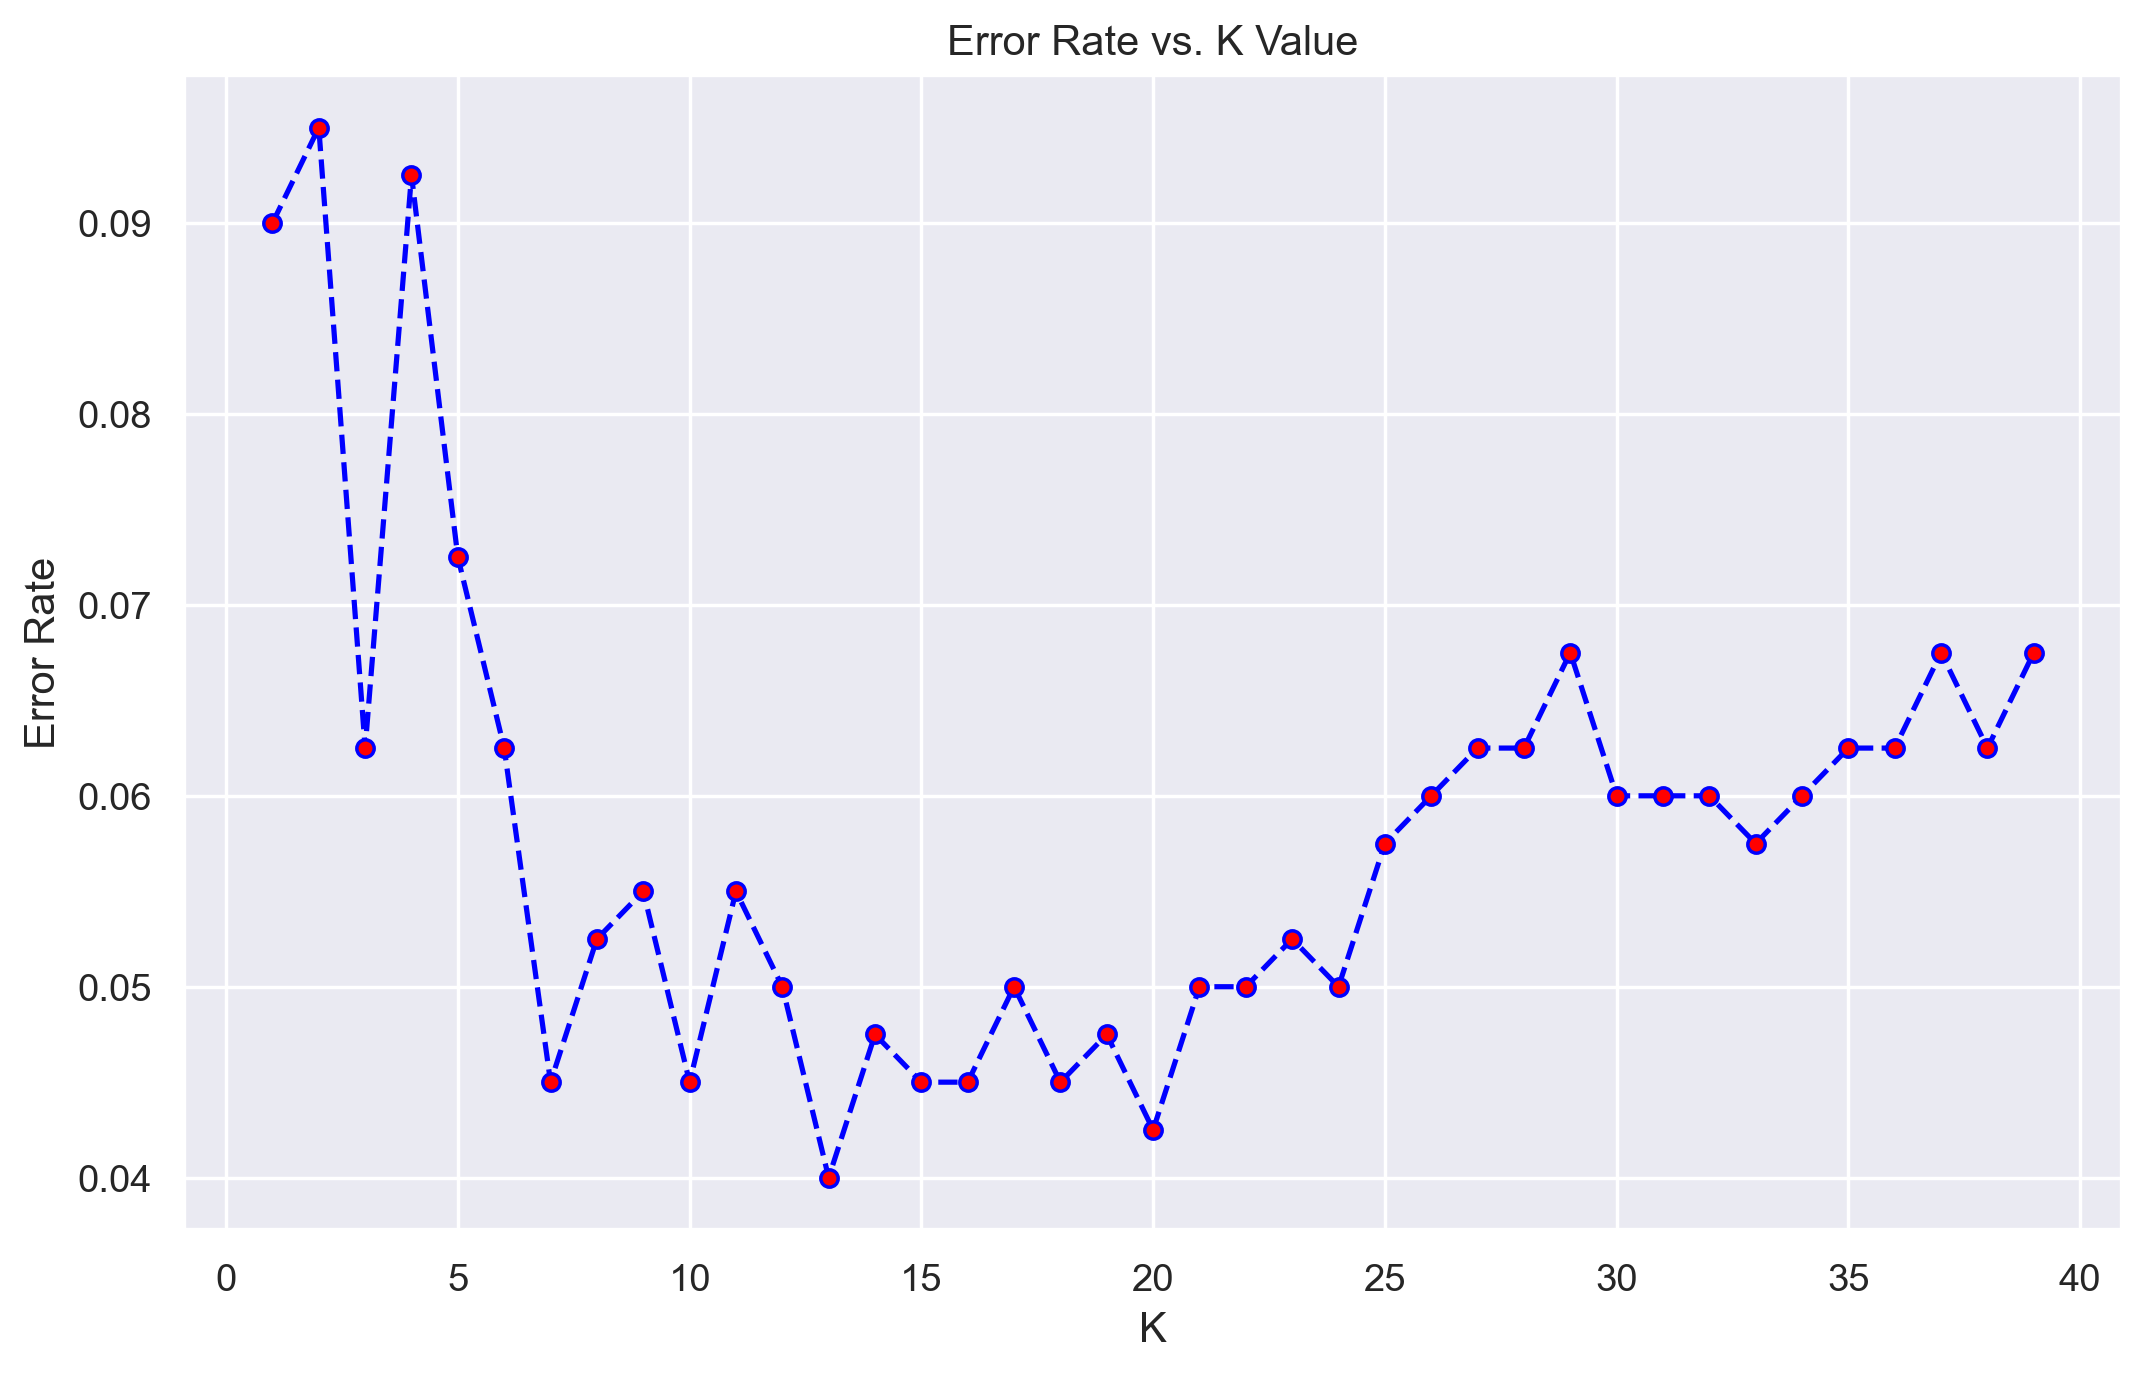

In [84]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:
knn1 = KNeighborsClassifier(n_neighbors = 14)
knn1.fit(x_train, y_train)
y_pred_train = knn1.predict(x_train)
y_pred_test = knn1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[ 94   1   0   0]
 [  3  88   1   0]
 [  0   5  92   2]
 [  0   0   7 107]]


classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.94      0.96      0.95        92
           2       0.92      0.93      0.92        99
           3       0.98      0.94      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



Training Accuracy 0.940625
********************************************************************************
Test Accuracy 0.9525
__________






### 2. Logistic Regression

In [86]:
logistic1 = LogisticRegression(random_state = 100)
logistic1.fit(x_train, y_train)
y_pred_train = logistic1.predict(x_train)
y_pred_test = logistic1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[77 15  3  0]
 [16 44 21 11]
 [ 1 25 27 46]
 [ 0  8 20 86]]


classification_report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        95
           1       0.48      0.48      0.48        92
           2       0.38      0.27      0.32        99
           3       0.60      0.75      0.67       114

    accuracy                           0.58       400
   macro avg       0.57      0.58      0.57       400
weighted avg       0.57      0.58      0.57       400



Training Accuracy 0.576875
********************************************************************************
Test Accuracy 0.585
__________






### 3. Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test,y_test)

0.92079628218741

### 4. Gradient Boosting Method

In [88]:
grb1 = GradientBoostingClassifier(learning_rate=0.33,random_state  = 101)
grb1.fit(x_train, y_train)
y_pred_train = grb1.predict(x_train)
y_pred_test = grb1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[ 92   3   0   0]
 [  2  84   6   0]
 [  0   4  88   7]
 [  0   0   6 108]]


classification_report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.92      0.91      0.92        92
           2       0.88      0.89      0.88        99
           3       0.94      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



Training Accuracy 1.0
********************************************************************************
Test Accuracy 0.93
__________






### 5. Support Vector Machine

In [89]:
svc1 = SVC(degree=3,random_state = 101)
svc1.fit(x_train,y_train)
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[ 94   1   0   0]
 [  3  88   1   0]
 [  0   5  88   6]
 [  0   0   3 111]]


classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.94      0.96      0.95        92
           2       0.96      0.89      0.92        99
           3       0.95      0.97      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



Training Accuracy 0.95625
********************************************************************************
Test Accuracy 0.9525
__________






# Conclusion

 Kindly Note: We are checking both train accuracy and Test accuracy inorder to have a check on overfitting problem
 We are getting 95.6 training accuracy and 95.2 of testing accuracy with SVM classifier which is by far the best fit